<a href="https://colab.research.google.com/github/riaz-356/LHC-ML-Techniques-ttZ/blob/main/LHC_using_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for file_name, file_content in uploaded.items():
    with open(file_name, 'wb') as f:
        f.write(file_content)



Saving 13TeV_ttZ.csv to 13TeV_ttZ.csv


In [ ]:
import sys
!{sys.executable} -m pip install --upgrade --user pip # update the pip package installer
!{sys.executable} -m pip install -U pandas scikit-learn --user # install required packages
!{sys.executable} -m pip install --upgrade pandas


  Using cached pip-24.0-py3-none-any.whl (2.1 MB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

lhcdata = "13TeV_ttZ.csv"
lhcdf = pd.read_csv(lhcdata)
lhcdf.describe()

# f = open(r"13TeV_ttZ.csv")

# print(f.readline())


,type,Channel,NJets,MET,Mll,LepDeltaPhi,LepDeltaR,SumLepPt,NBJets,weight
count,344579.000000,344579.000000,344579.000000,344579.000000,344579.000000,344579.000000,344579.000000,344579.000000,344579.000000,344579.000000
mean,1.738742,0.567730,3.558264,35.734560,84.692813,1.749069,2.042555,79.193869,0.445439,0.849369
std,1.554623,0.626635,0.943408,28.525151,16.162715,0.845850,0.717347,45.921459,0.699871,3.975248
min,0.000000,0.000000,3.000000,0.040000,10.000000,0.000000,0.300000,0.140000,0.000000,-1023.777780
25%,0.000000,0.000000,3.000000,17.030000,85.920000,1.090000,1.480000,43.350000,0.000000,0.202060
50%,3.000000,0.000000,3.000000,28.120000,89.930000,1.780000,2.040000,71.290000,0.000000,1.000000
75%,3.000000,1.000000,4.000000,44.710000,92.320000,2.470000,2.640000,108.985000,1.000000,1.000000
max,4.000000,2.000000,14.000000,199.960000,105.000000,3.140000,4.160000,200.000000,5.000000,161.138120


In [ ]:
samples_SR = {
    0: {'name': 'Data'
    },
    1: {'name': 'ttZ',
        'color' : 'blue'
    },
    2: {'name': 'tt',
        'color' : 'lightgrey'
    },
    3: {'name': 'Z',
        'color' : 'red'
    },
    4: {'name': 'Other',
        'color' : 'green'
    },
}

print(samples_SR)

samplesplot = samples_SR

{0: {'name': 'Data'}, 1: {'name': 'ttZ', 'color': 'blue'}, 2: {'name': 'tt', 'color': 'lightgrey'}, 3: {'name': 'Z', 'color': 'red'}, 4: {'name': 'Other', 'color': 'green'}}


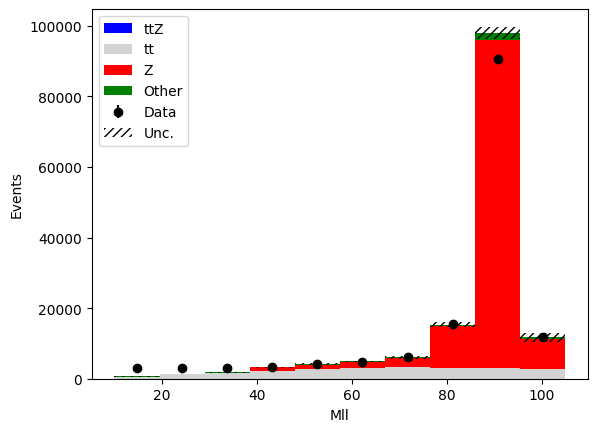

In [ ]:
def plot_data(df, x_var, samplesplot=samples_SR):
  min_x = min(df[x_var])
  max_x = max(df[x_var])
  step_x = (max_x-min_x)/10

  bin_edges = np.arange(start=min_x, stop=max_x+step_x, step=step_x)
  bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2 #stop is max + extra slice, centres is just mean of min and max edge#
  mc_x = []
  mc_weights = []
  mc_colors = []
  mc_labels = []

  mc_stat_uncer_sqr = np.zeros(len(bin_centres))
  for n in samplesplot: #when n=0, each interval is data
    if n!=0: #if no longer data
      mc_x.append(df[df['type']==n][x_var])
      mc_weights.append(df[df['type']==n]['weight'])
      mc_colors.append(samplesplot[n]['color'])
      mc_labels.append(samplesplot[n]['name'])
      weights_sqr, _ = np.histogram(df[df['type']==n][x_var], bins=bin_edges,
                                             weights=df[df['type']==n]['weight']**2) #,_ due to it taking two vars but us only giving one, _ so it dont break
      mc_stat_uncer_sqr = np.add(mc_stat_uncer_sqr, weights_sqr)

  mc_heights = plt.hist(mc_x, bins = bin_edges, weights = mc_weights, stacked=True, color = mc_colors, label = mc_labels)
  mc_x_total = mc_heights[0][-1] #??why [0][-1]??
  mc_x_error = np.sqrt(mc_stat_uncer_sqr)

  df_x, _ = np.histogram(df[df['type']==0][x_var], bins=bin_edges)

  df_x_errors = np.sqrt(df_x)

  plt.errorbar(x=bin_centres, y=df_x, yerr=df_x_errors, fmt='ko', label='Data')

  plt.bar(bin_centres, 2*mc_x_error, alpha=0.5, bottom=mc_x_total-mc_x_error, color='none', hatch="////", width=step_x, label='Unc.')

  plt.xlabel(x_var)
  plt.ylabel('Events')
  plt.legend()

plot_data(lhcdf, x_var='Mll')

In [ ]:
lhcdfselection = lhcdf[(lhcdf['Channel']!=2) &
                       (lhcdf['NJets']>=6) &      #>=6 for my selections
                       (lhcdf['NBJets']>=2) &     #>=2
                       (lhcdf['Mll']>80) &        #>80
                       (lhcdf['Mll']<90) &        #<90
                       (lhcdf['LepDeltaPhi']<180) &
                       (lhcdf['LepDeltaR']<3) &
                       (lhcdf['SumLepPt']>30)
                    ]                           #these changes return REALLY LARGE error bars

lhcdfselection

,type,Channel,NJets,MET,Mll,LepDeltaPhi,LepDeltaR,SumLepPt,NBJets,weight
1992,0,1,7,36.20,89.40,2.25,2.49,62.32,2,1.00000
6420,0,0,7,15.98,89.16,1.94,2.35,67.20,3,1.00000
9563,0,0,6,36.66,81.96,1.05,1.13,158.71,2,1.00000
15269,0,1,6,29.18,89.71,2.11,2.13,53.00,2,1.00000
15419,0,0,6,109.04,82.98,1.63,1.63,110.59,2,1.00000
...,...,...,...,...,...,...,...,...,...,...
334517,4,0,8,26.55,86.12,0.92,1.28,158.34,2,0.00636
335710,4,1,6,106.81,89.28,0.82,0.92,186.22,2,0.00283
339161,4,0,9,43.45,87.35,0.92,0.92,181.84,3,0.43339
339639,4,0,6,72.53,88.13,1.79,2.04,59.86,2,0.30907


In [ ]:
lhcdfselection2 = lhcdf[(lhcdf['Channel']!=2) &
                        (lhcdf['NJets']>=5) &      #>=6 for my selections
                       (lhcdf['NBJets']>=1) &     #>=2
                       (lhcdf['Mll']>81.12) &        #>80
                       (lhcdf['Mll']<101.12) &        #<90
                       (lhcdf['LepDeltaPhi']<180) &
                       (lhcdf['LepDeltaR']<3) &
                       (lhcdf['SumLepPt']>30)
                    ]                           #these changes return REALLY LARGE error bars

lhcdfselection2

,type,Channel,NJets,MET,Mll,LepDeltaPhi,LepDeltaR,SumLepPt,NBJets,weight
7,0,1,6,25.80,91.90,2.35,2.39,37.51,1,1.00000
40,0,1,5,12.21,92.20,2.94,2.94,37.22,1,1.00000
44,0,1,5,25.10,88.14,2.15,2.59,46.19,2,1.00000
124,0,0,7,49.99,92.49,0.57,1.50,145.59,1,1.00000
238,0,1,5,13.68,96.92,2.05,2.20,79.22,1,1.00000
...,...,...,...,...,...,...,...,...,...,...
344416,4,0,5,31.92,90.50,1.27,2.26,62.63,1,0.22986
344448,4,0,7,59.72,94.34,2.63,2.76,73.35,1,0.25186
344478,4,0,5,41.16,92.18,1.40,1.53,115.42,1,0.22737
344552,4,1,7,14.24,89.51,1.61,1.69,93.50,1,0.36640


In [ ]:
lhcdfselection3 = lhcdf[(lhcdf['Channel']!=2) &
                        (lhcdf['NJets']>=6) &      #>=6 for my selections
                       (lhcdf['NBJets']>=2) &     #>=2
                       (lhcdf['Mll']>80) &        #>80
                       (lhcdf['Mll']<95) &        #<90
                       (lhcdf['LepDeltaPhi']<180) &
                       (lhcdf['LepDeltaR']<3) &
                       (lhcdf['SumLepPt']>30)
                    ]                           #these changes return REALLY LARGE error bars

lhcdfselection3

,type,Channel,NJets,MET,Mll,LepDeltaPhi,LepDeltaR,SumLepPt,NBJets,weight
1992,0,1,7,36.20,89.40,2.25,2.49,62.32,2,1.00000
3542,0,0,7,61.26,90.84,0.26,1.21,149.47,2,1.00000
5192,0,1,6,9.64,90.81,1.40,1.86,77.10,3,1.00000
5241,0,1,7,44.65,91.13,2.58,2.61,31.64,2,1.00000
6420,0,0,7,15.98,89.16,1.94,2.35,67.20,3,1.00000
...,...,...,...,...,...,...,...,...,...,...
339161,4,0,9,43.45,87.35,0.92,0.92,181.84,3,0.43339
339639,4,0,6,72.53,88.13,1.79,2.04,59.86,2,0.30907
340187,4,1,6,53.17,94.04,2.23,2.31,47.57,2,0.39985
340640,4,0,8,29.03,90.21,1.25,1.26,178.67,3,0.27401


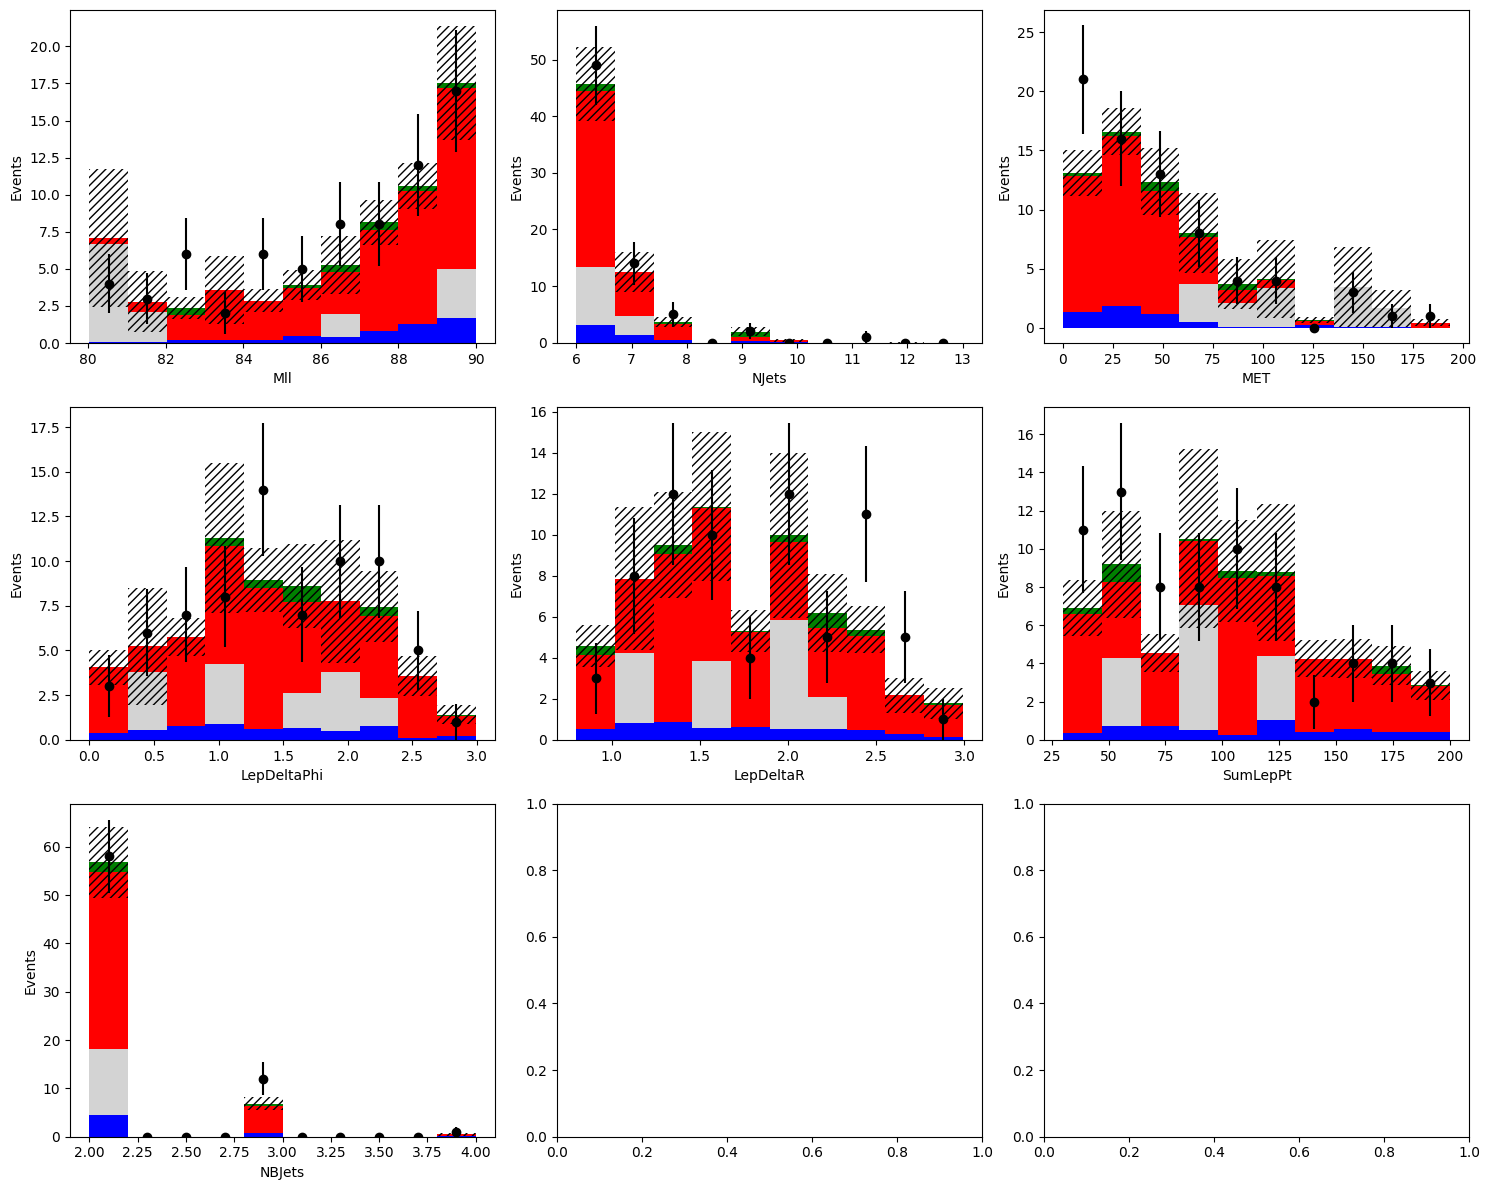

In [ ]:
variables = ['Mll', 'NJets', 'MET', 'LepDeltaPhi', 'LepDeltaR', 'SumLepPt', 'NBJets']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

axes = axes.flatten()

for i, variable in enumerate(variables):
    plt.sca(axes[i])
    plot_data(lhcdfselection, x_var=variable)
    plt.legend('',frameon=False)
plt.tight_layout()

plt.show()


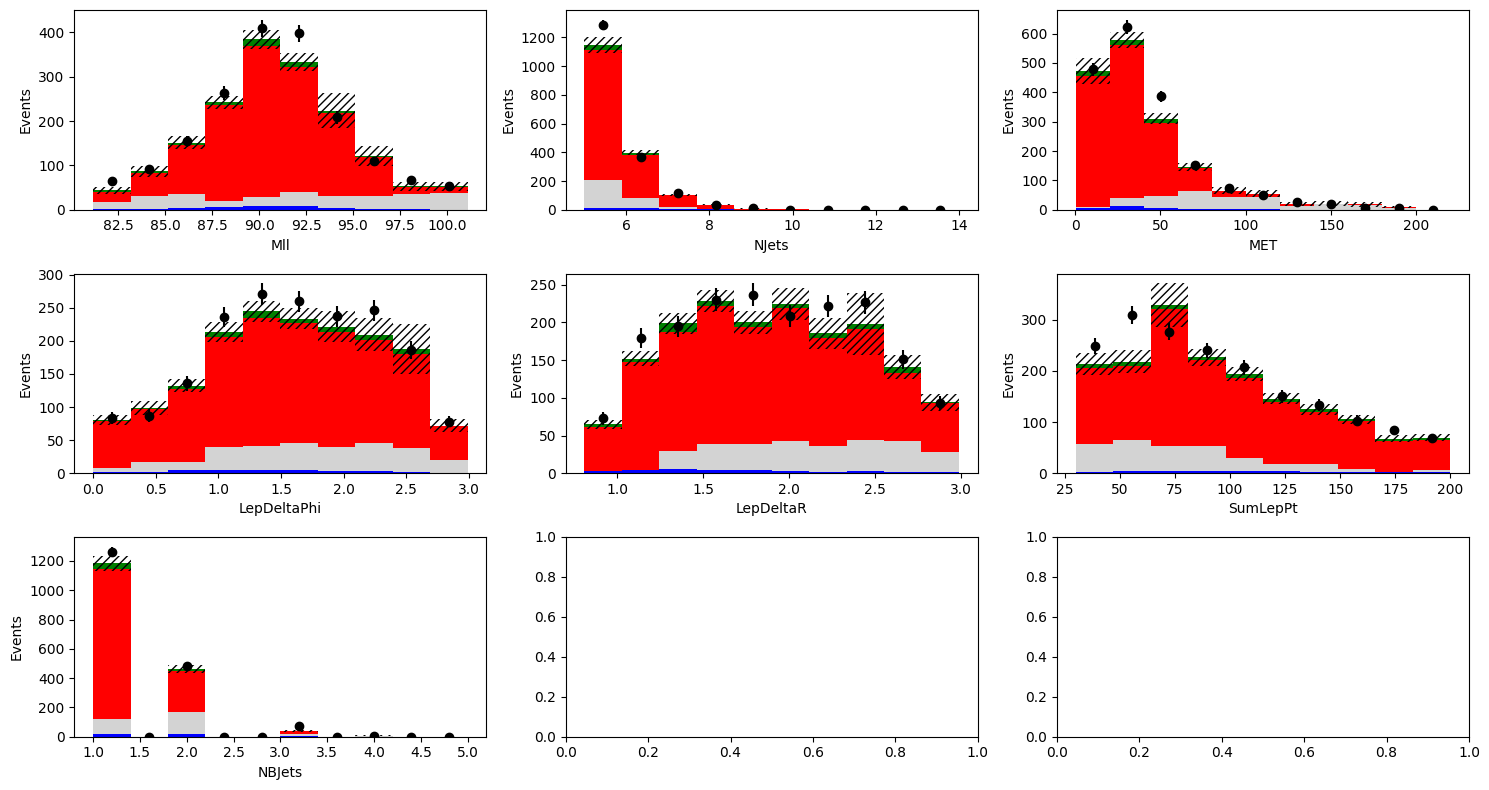

In [ ]:
variables = ['Mll', 'NJets', 'MET', 'LepDeltaPhi', 'LepDeltaR', 'SumLepPt', 'NBJets']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))

axes = axes.flatten()

for i, variable in enumerate(variables):
    plt.sca(axes[i])
    plot_data(lhcdfselection2, x_var=variable)
    plt.legend('',frameon=False)
plt.tight_layout()

plt.show()


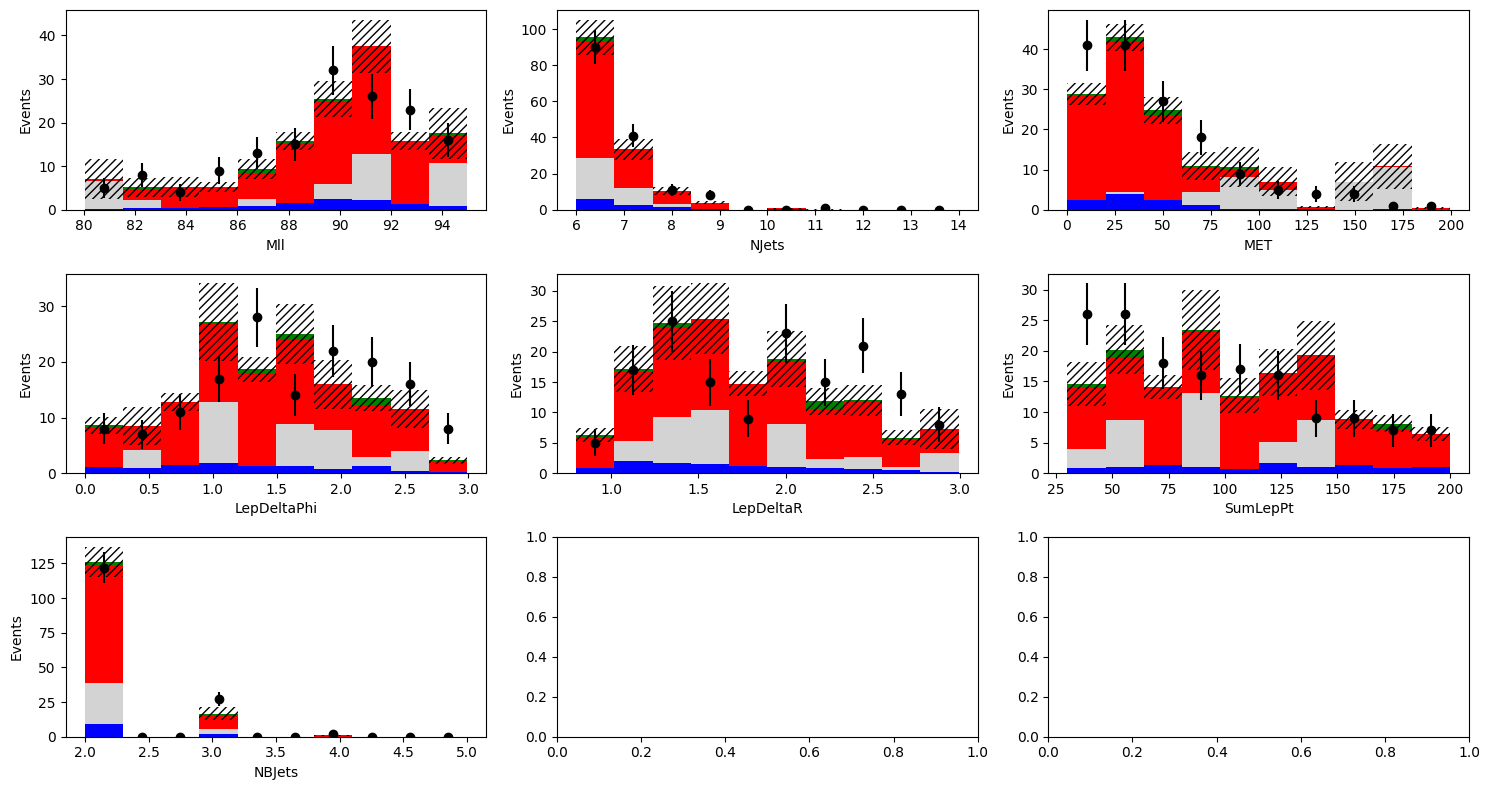

In [ ]:
variables = ['Mll', 'NJets', 'MET', 'LepDeltaPhi', 'LepDeltaR', 'SumLepPt', 'NBJets']

# Create subplots with 2 rows and 4 columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))

# Flatten the 2D array of axes for easy iteration
axes = axes.flatten()

# Plot each variable in a subplot
for i, variable in enumerate(variables):
    # Assuming lhcdf is your DataFrame
    plt.sca(axes[i])
    plot_data(lhcdfselection3, x_var=variable)
    plt.legend('',frameon=False)
# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
def plot_separation(data, x_variable, samples_to_plot=samples_SR):

    min_x = min(data[x_variable]) # minimum x-value for this variable
    max_x = max(data[x_variable]) # maximum x-value for this variable
    step_x = (max_x-min_x)/10 # step size in x-value for this variable

    bin_edges = np.arange(start=min_x, # The interval includes this value
                          stop=max_x+step_x, # The interval doesn't include this value
                          step=step_x ) # Spacing between values

    # clip signal underflow and overflow into x-axis range
    signal_x = data[data['type']==1][x_variable]

    mc_x = [] # define list to hold the MC histogram entries
    for s in samples_to_plot: # loop over samples
        if s!=0 and s!=1: # if not data nor signal
            mc_x = [*mc_x, # mc_x for previous sample
                    *data[data['type']==s][x_variable] ] # this sample


    main_axes = plt.gca() # get current axes

    # plot the background Monte Carlo distribution
    mc_heights = plt.hist(mc_x,
                          bins=bin_edges,
                          density=True, # normalise the histogram
                          histtype='step', color='red',
                          label='background' )

    # plot the signal distribution
    signal_heights = plt.hist(signal_x,
                              bins=bin_edges,
                              density=True, # normalise the histogram
                              histtype='step', color='blue',
                              label='signal',
                              linestyle='--' ) # dashed line

    bin_width = (max(data[x_variable])-min(data[x_variable]))/10
    separation = 0 # start separation counter at 0
    nstep  = 10 # number of bins
    nS     = sum(signal_heights[0])*bin_width # signal integral
    nB     = sum(mc_heights[0])*bin_width # background integral
    for bin_i in range(nstep): # loop over each bin
        s = signal_heights[0][bin_i]/nS # normalised signal in bin_i
        b = mc_heights[0][bin_i]/nB # normalised background in bin_i
        if (s + b > 0): separation += (s - b)*(s - b)/(s + b) # separation
    separation *= 0.5*bin_width # multiply by 0.5 x bin_width

    # x-axis label
    plt.xlabel(x_variable )

    # y-axis label
    plt.ylabel('Normalised units')

    # draw the legend
    plt.legend() # no box around the legend

    plt.title(str(round(separation*100,1))+'% Separation between signal and background')

    #plt.show() # show the Signal and background distributions


    # *************
    # Signal to background ratio
    # *************
    plt.figure() # start new figure
    SoverB = [] # list to hold S/B values
    for cut_value in bin_edges: # loop over bins
        signal_weights_passing_cut = sum(data[(data['type']==1) & (data[x_variable]>cut_value)].weight)
        background_weights_passing_cut = 0 # start counter for background weights passing cut
        for s in [2,3,4]: # loop over background samples
            background_weights_passing_cut += sum(data[(data['type']==s) & (data[x_variable]>cut_value)].weight)
        if background_weights_passing_cut!=0: # some background passes cut
            SoverB_value = signal_weights_passing_cut/background_weights_passing_cut
            SoverB_percent = 100*SoverB_value # multiply by 100 for percentage
            SoverB.append(SoverB_percent) # append to list of S/B values

    plt.plot( bin_edges[:len(SoverB)], SoverB ) # plot the data points
    plt.ylim( bottom=0 ) # set the x-limit of the main axes
    plt.ylabel( 'S/B (%)' ) # write y-axis label for main axes
    plt.title('signal:background ratio for different '+x_variable+' selection values')
    plt.xlabel( x_variable ) # x-axis label

    plt.show() # show S/B plot


MAYBE CONSIDER TWO FUNCTIONS FOR SEPARATION AND S/B

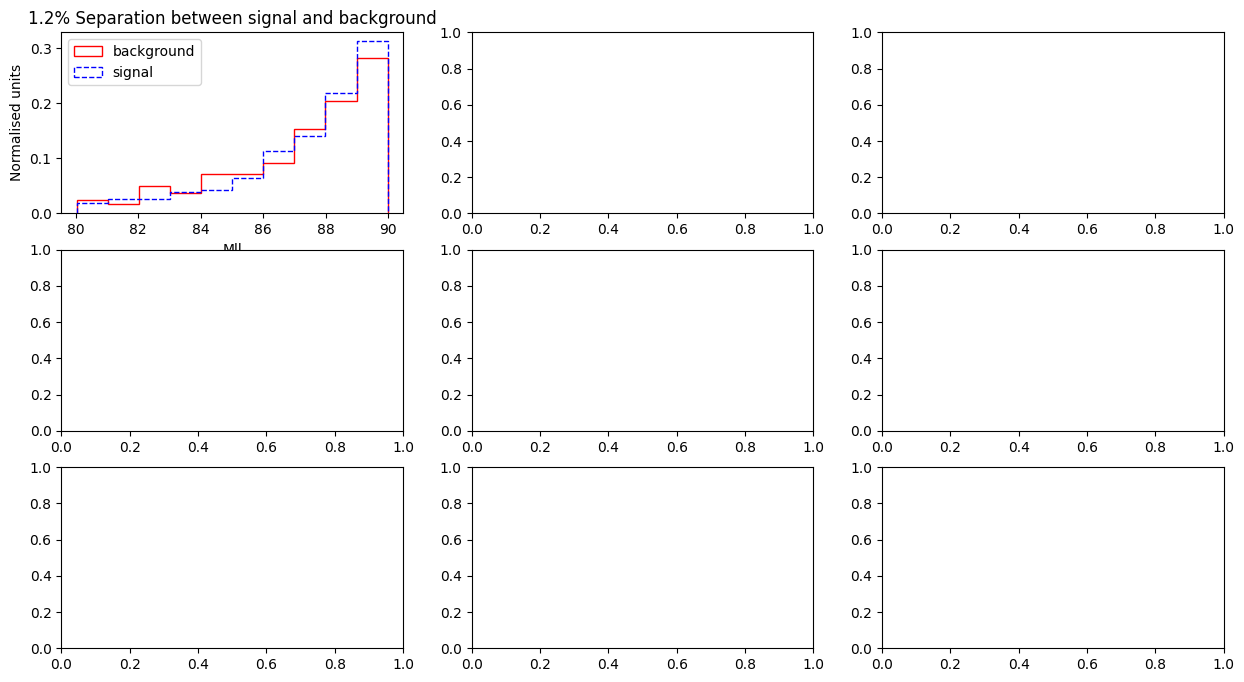

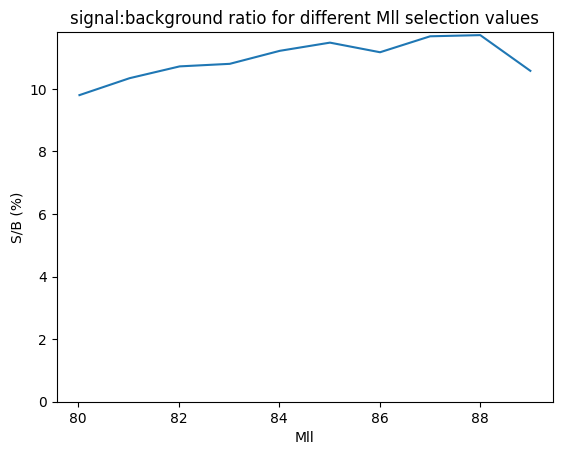

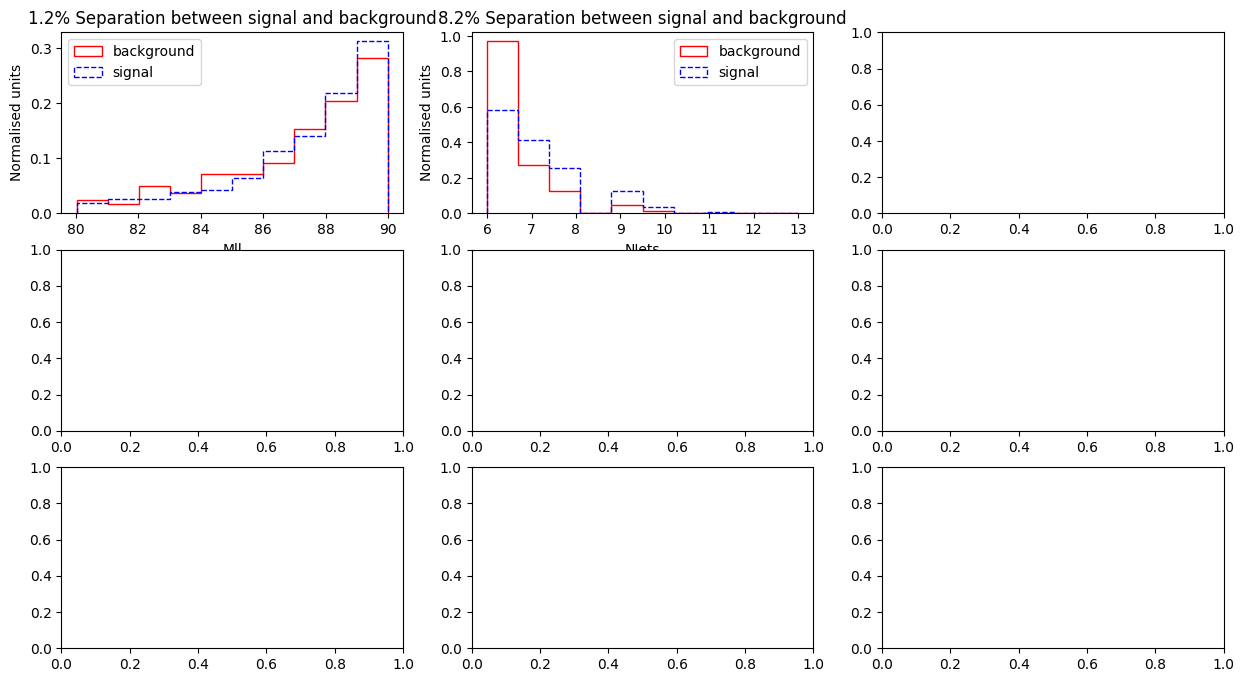

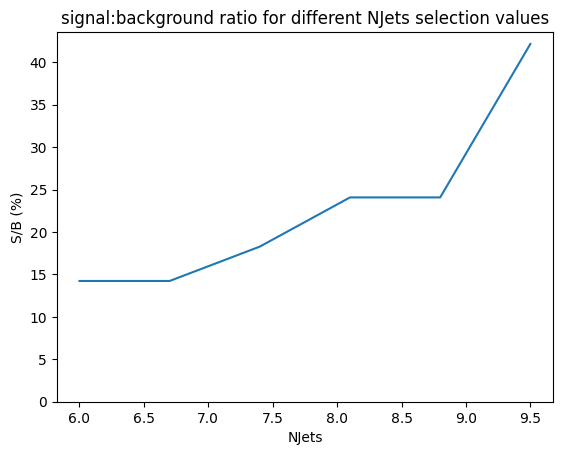

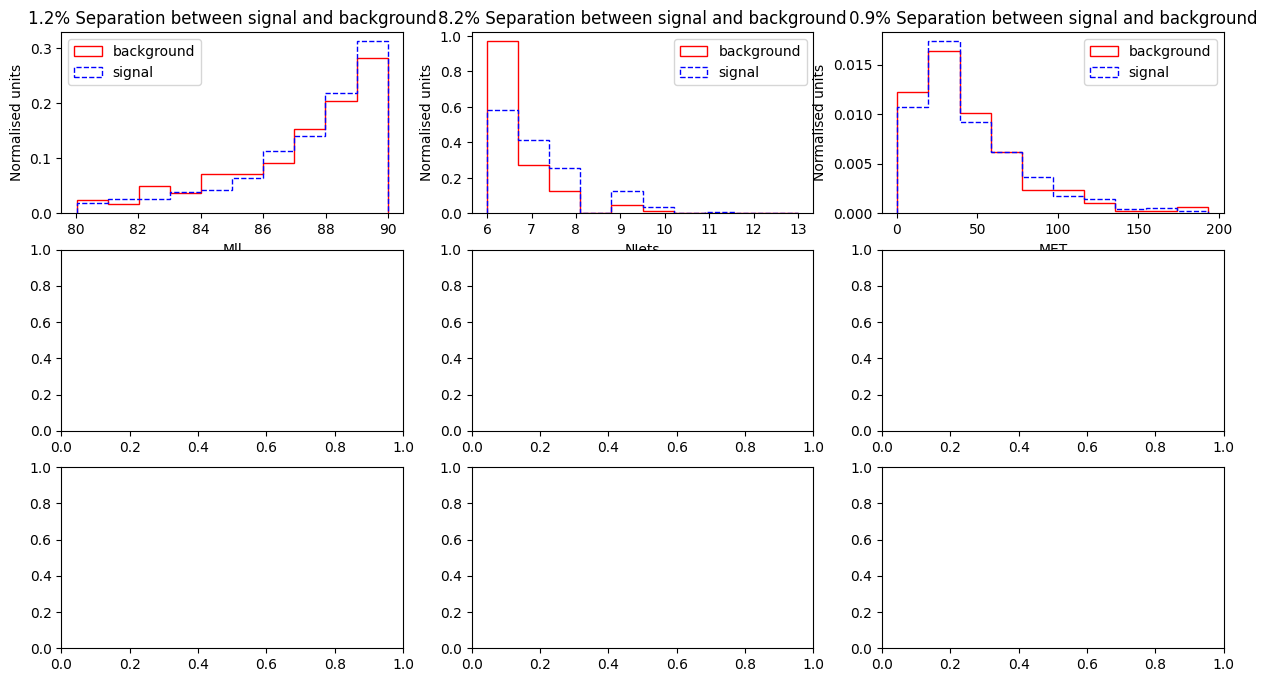

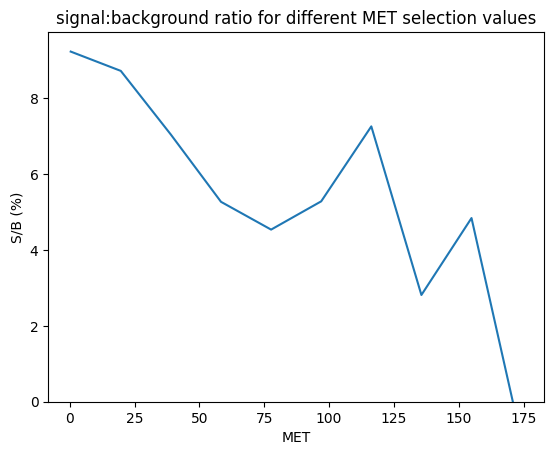

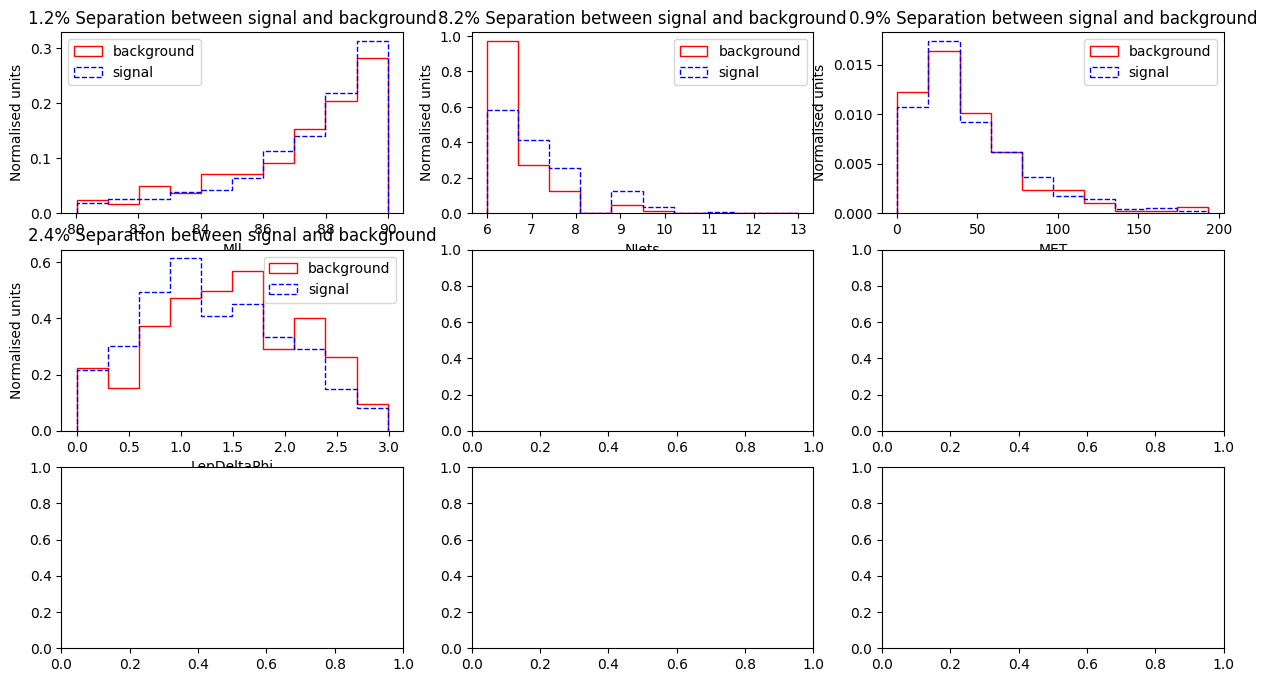

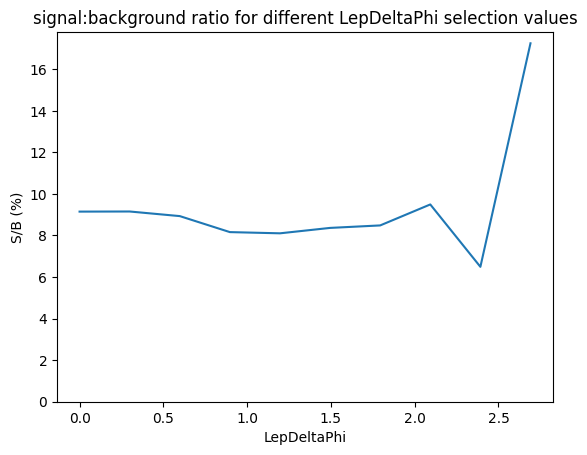

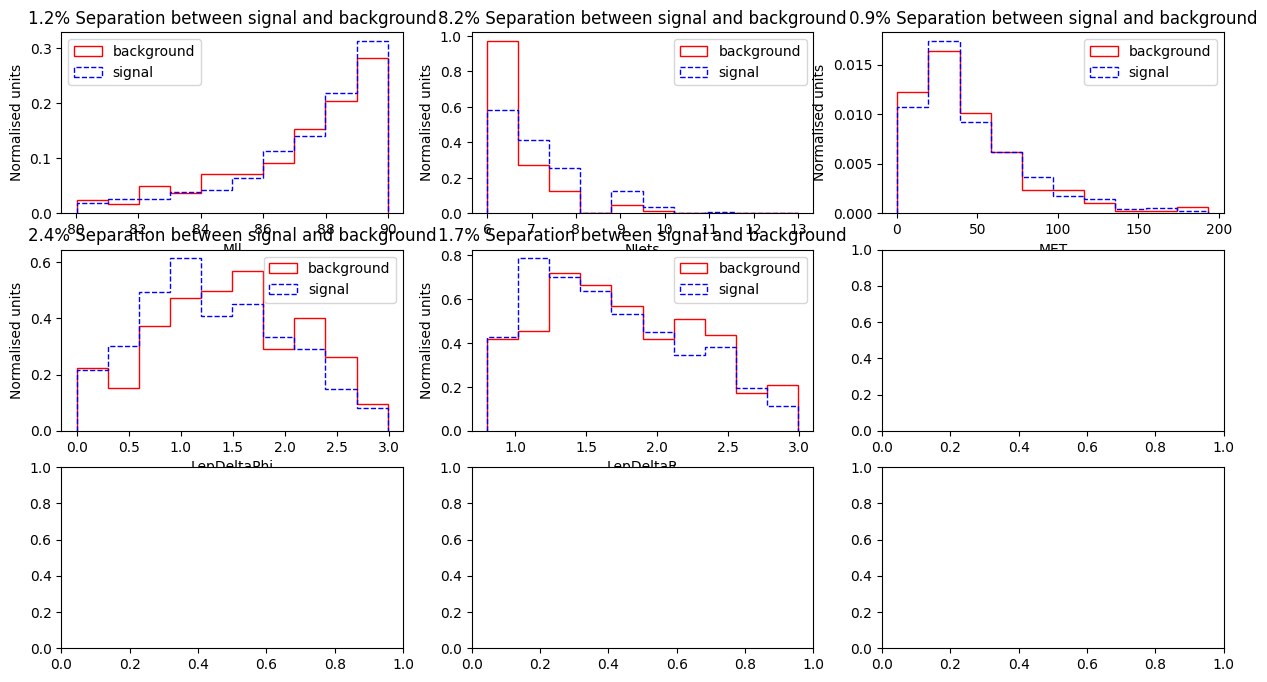

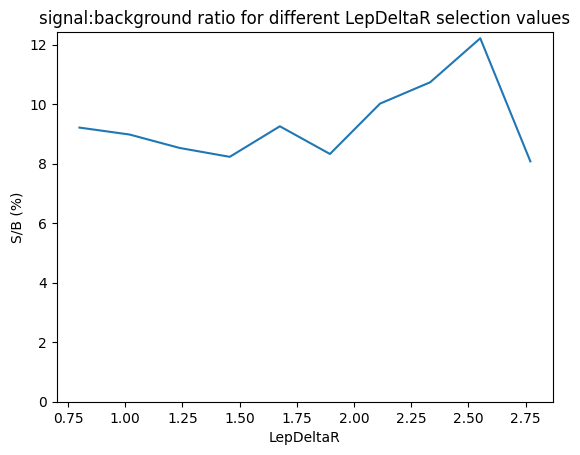

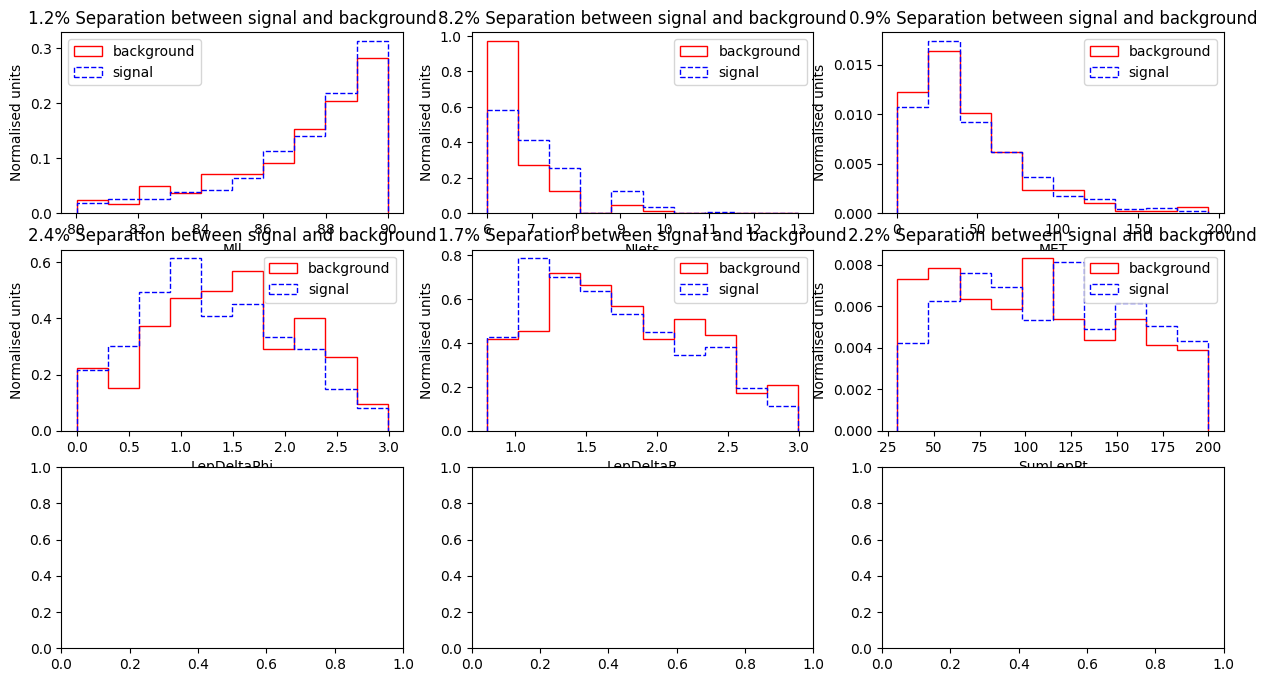

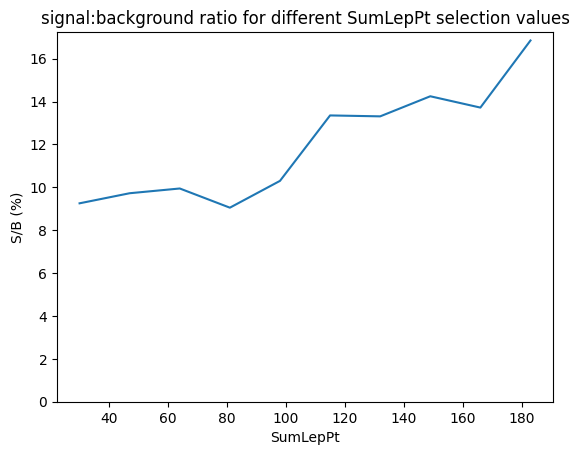

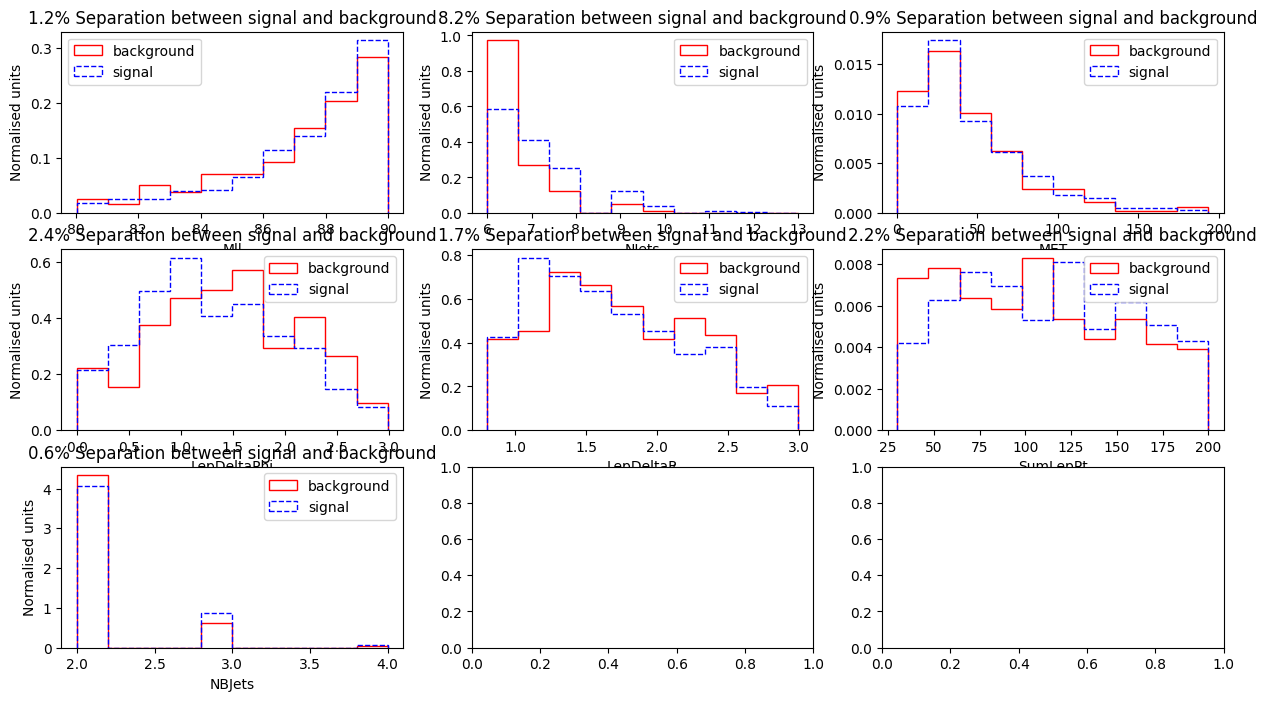

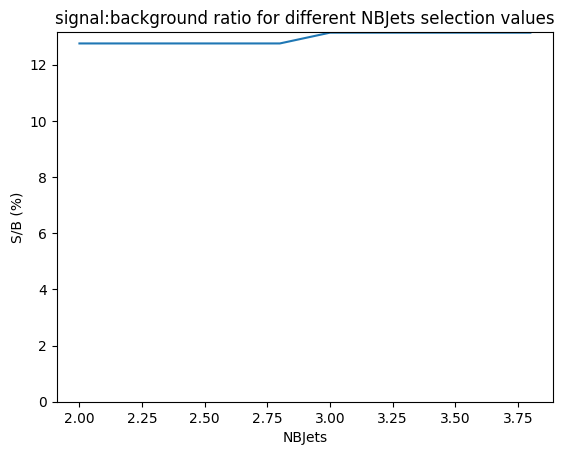

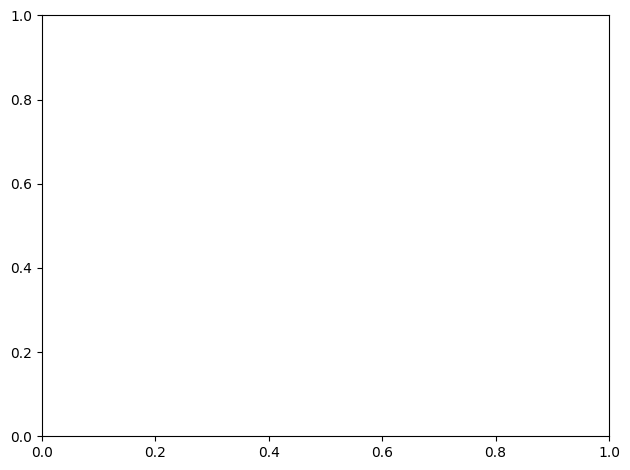

In [ ]:
variables = ['Mll', 'NJets', 'MET', 'LepDeltaPhi', 'LepDeltaR', 'SumLepPt', 'NBJets']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))

axes = axes.flatten()

for i, variable in enumerate(variables):
    plt.sca(axes[i])
    plot_separation(lhcdfselection, x_variable=variable)
    plt.legend('',frameon=False)
plt.tight_layout()

plt.show()


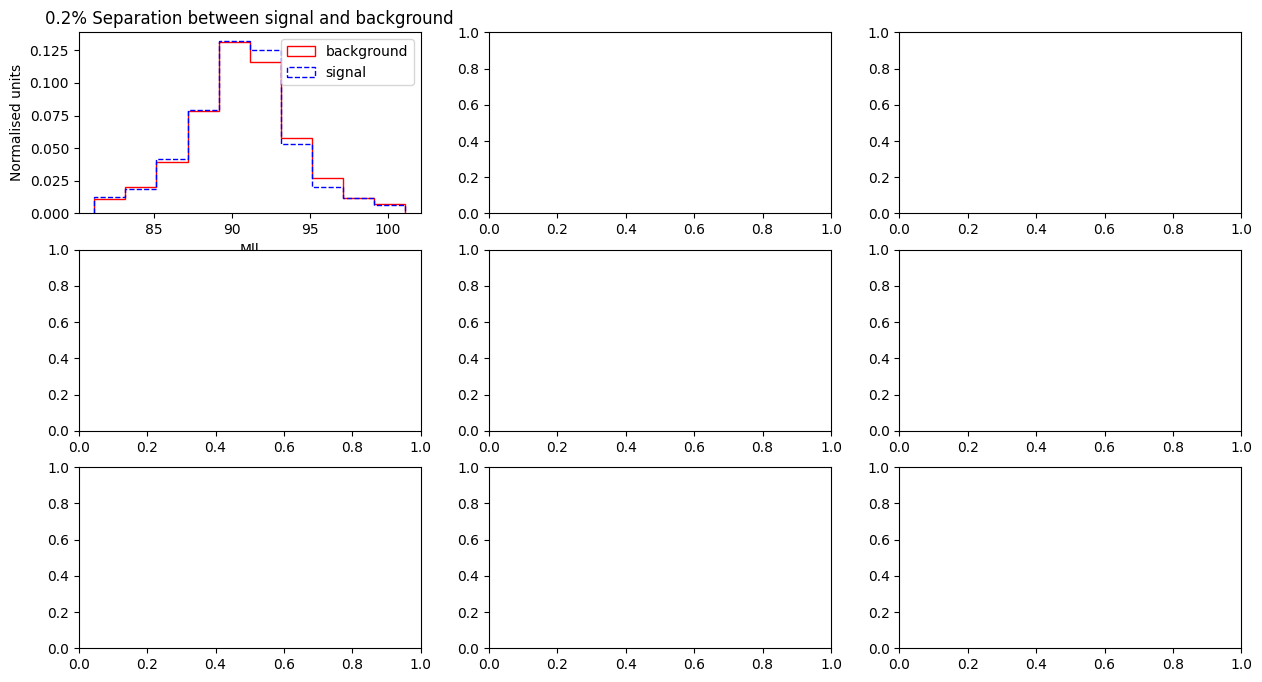

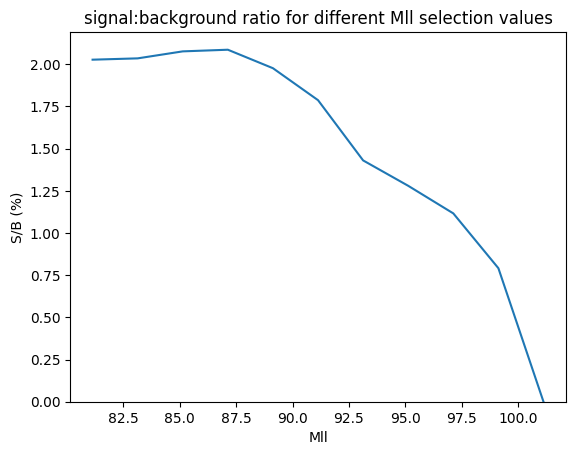

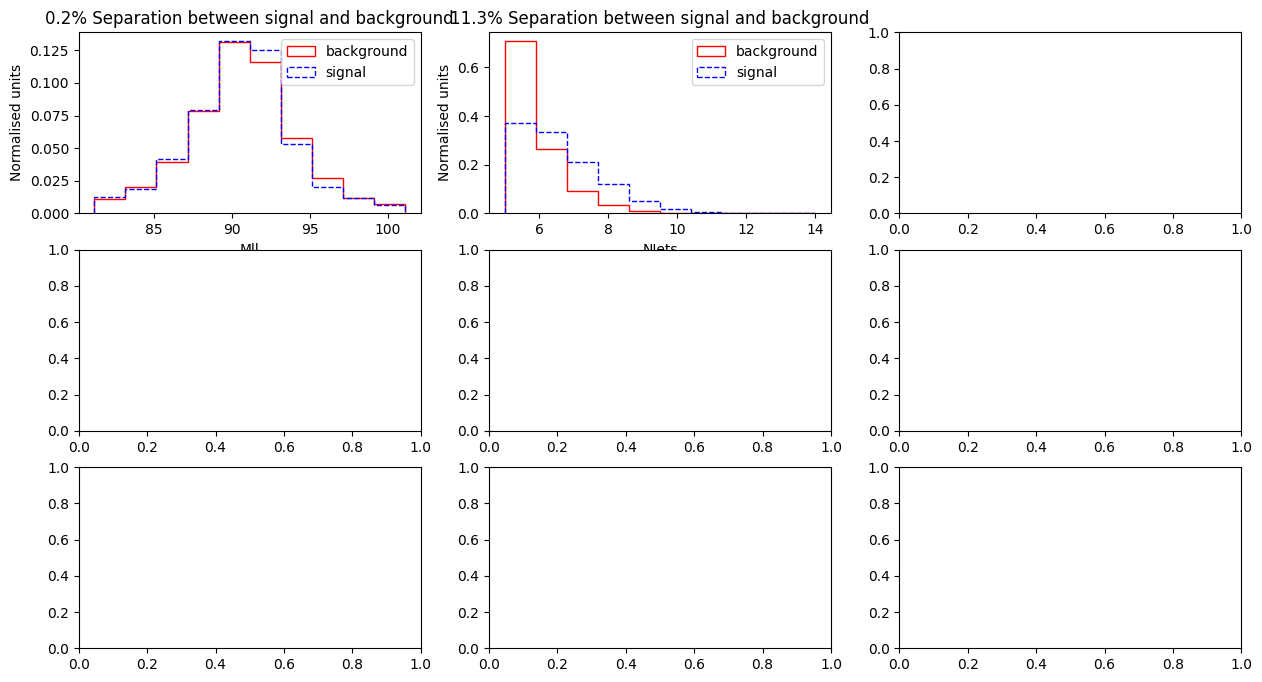

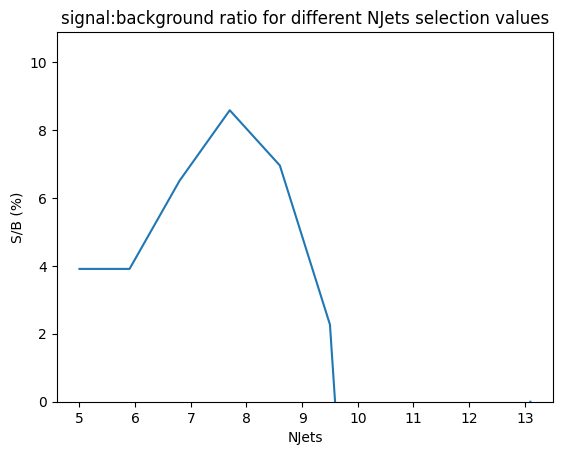

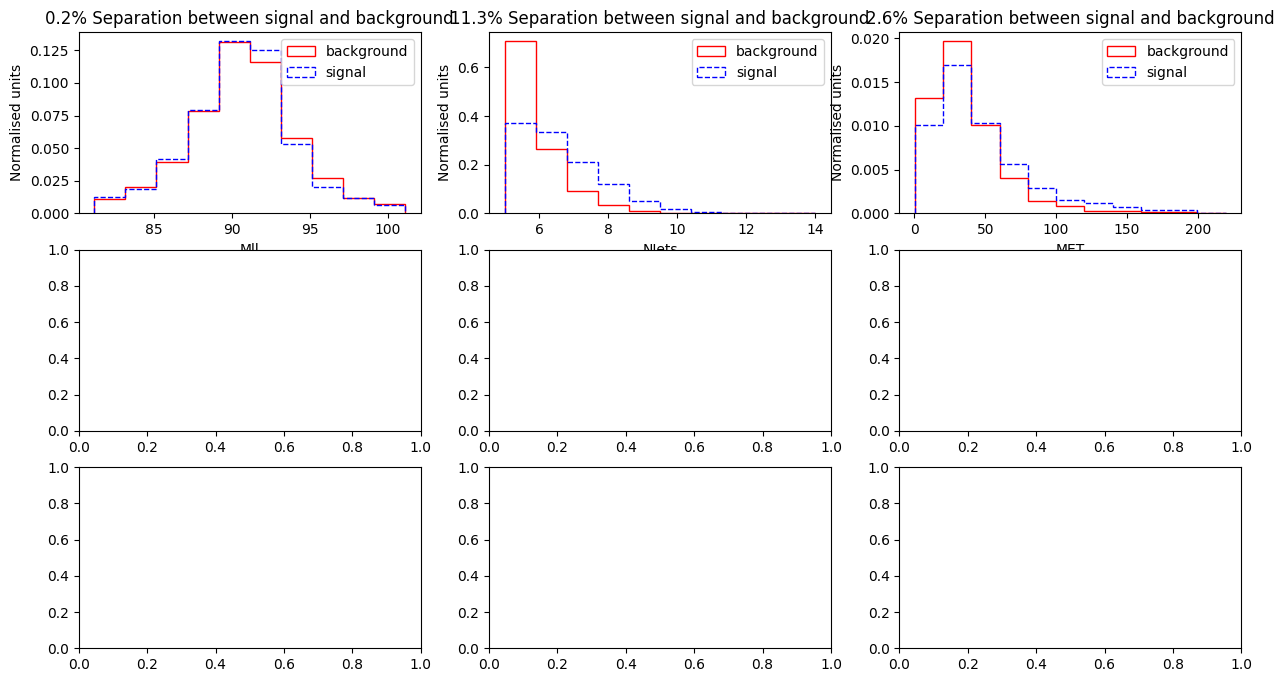

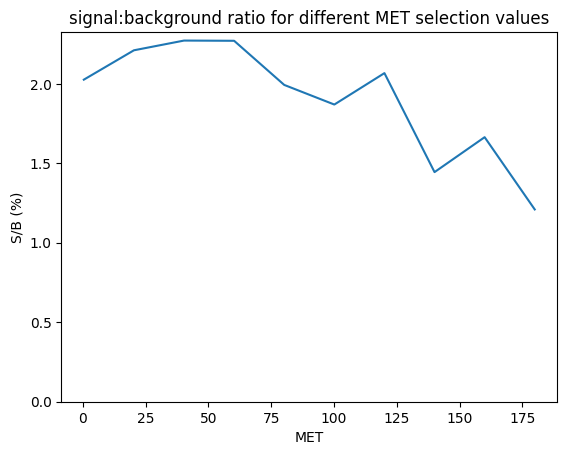

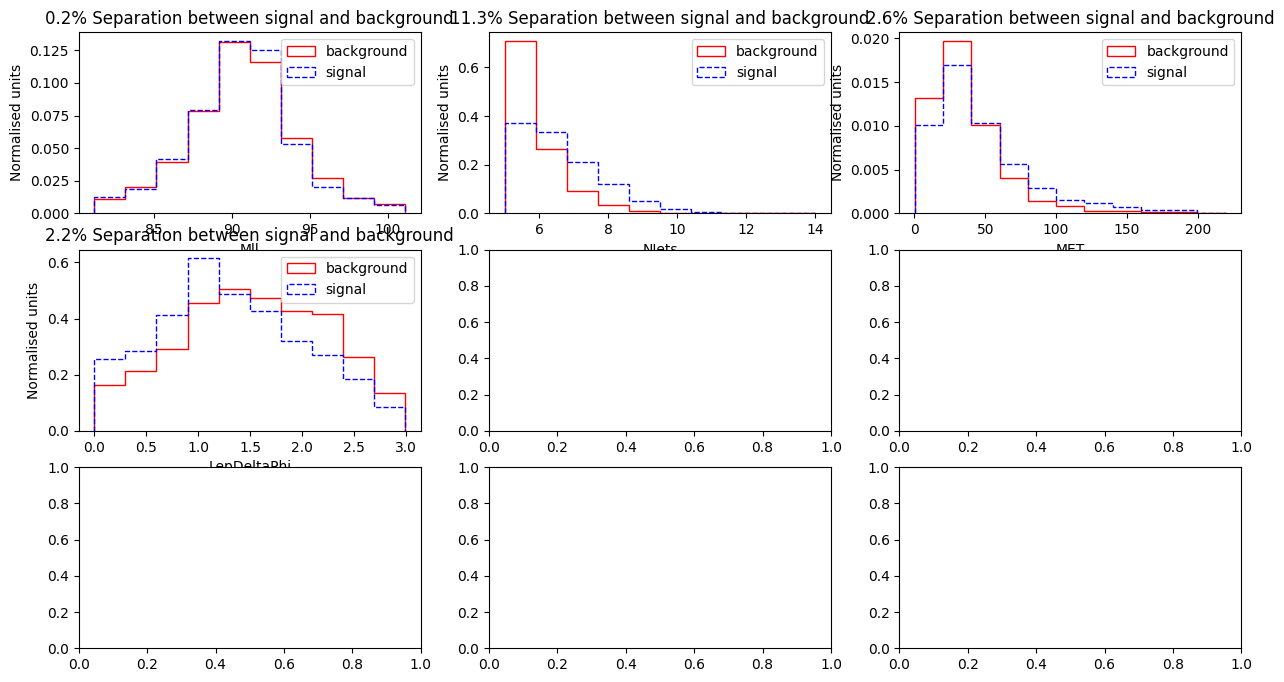

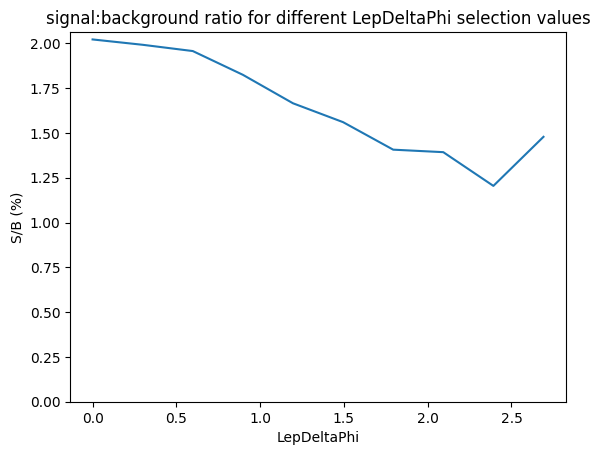

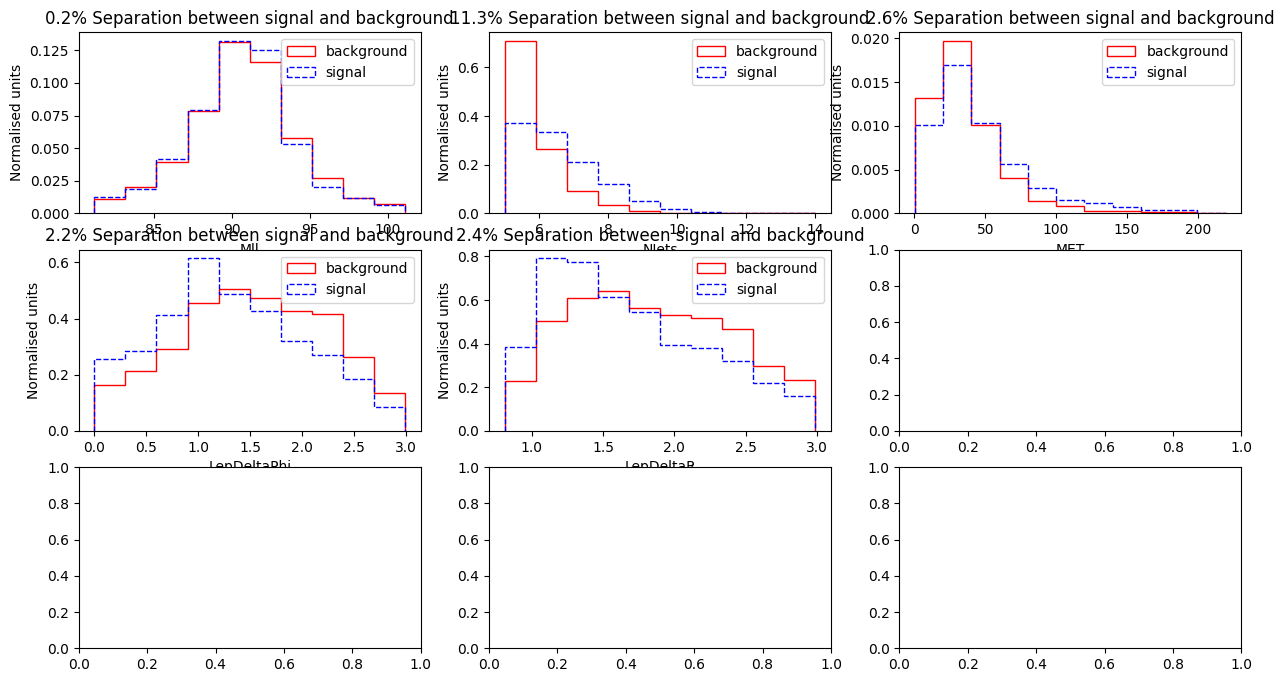

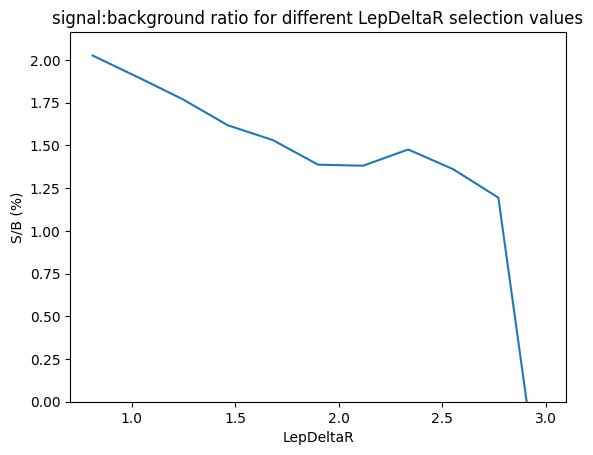

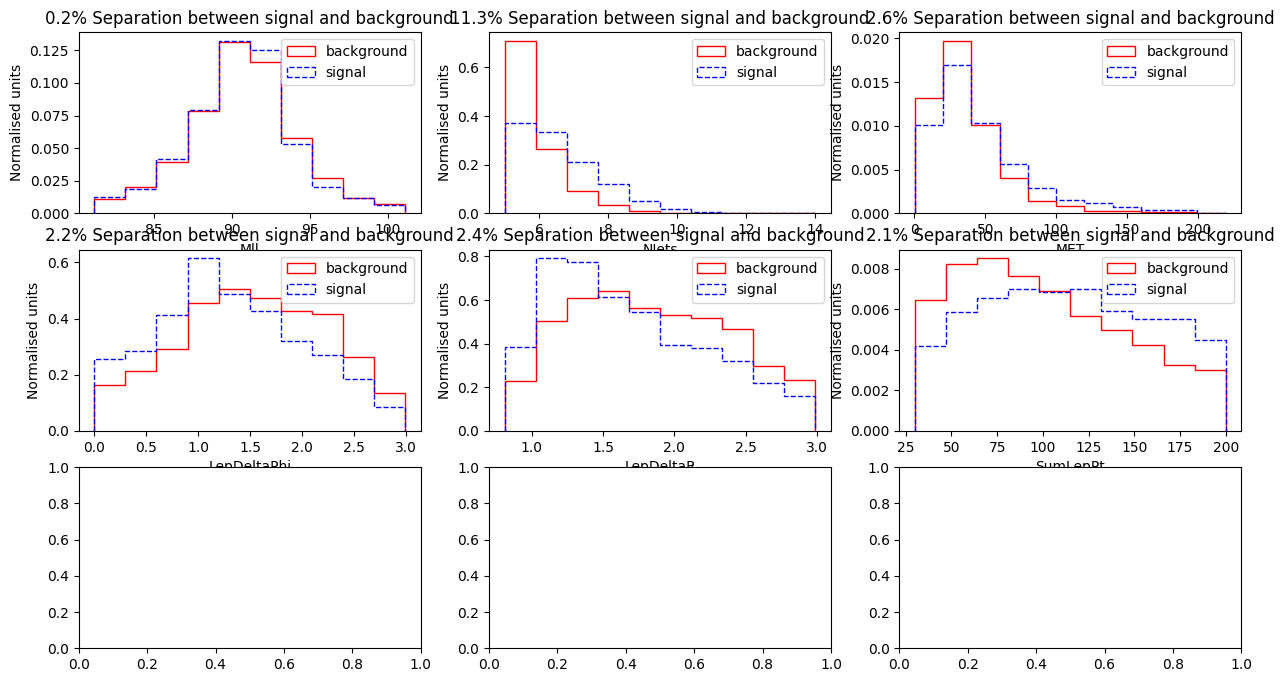

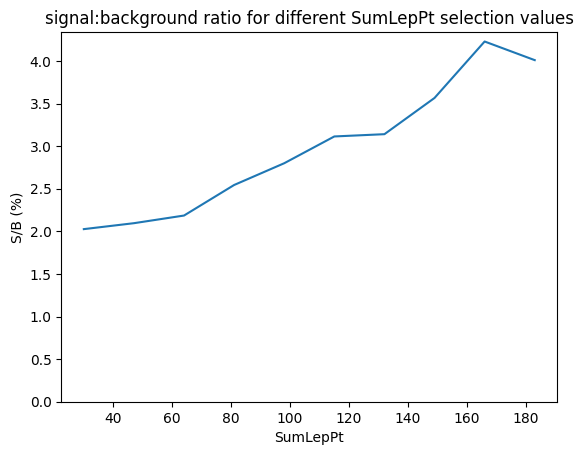

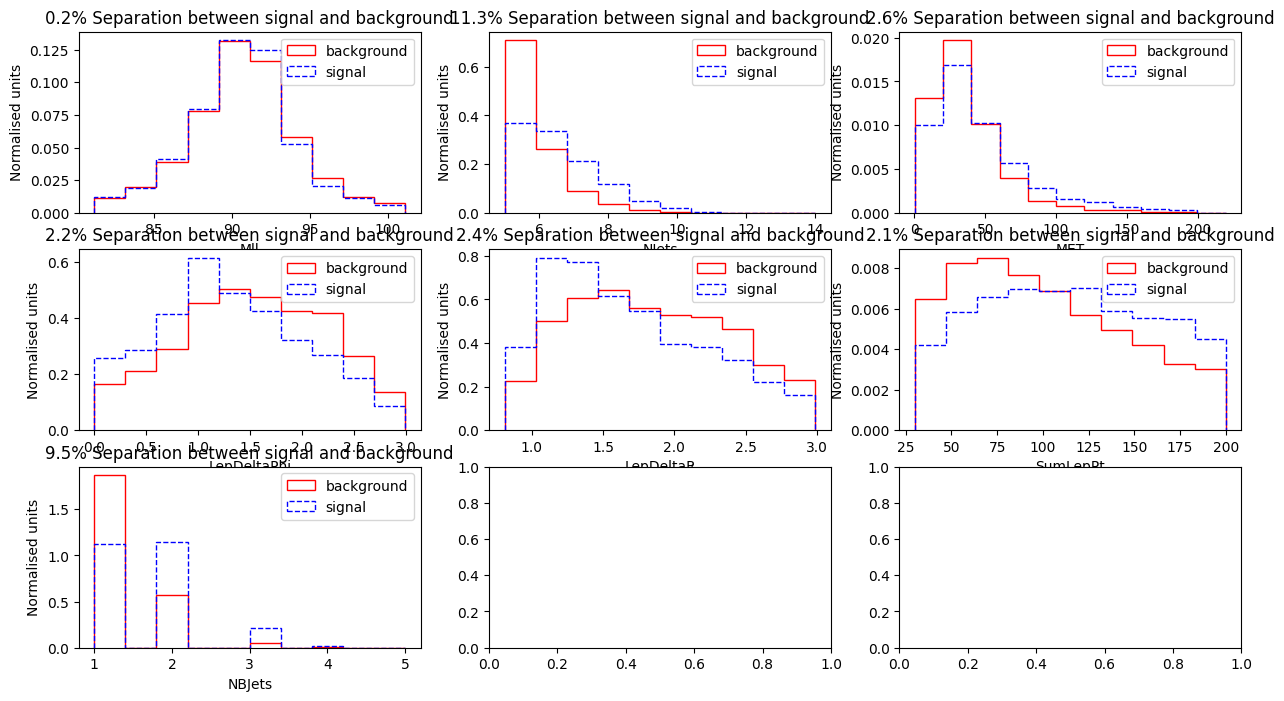

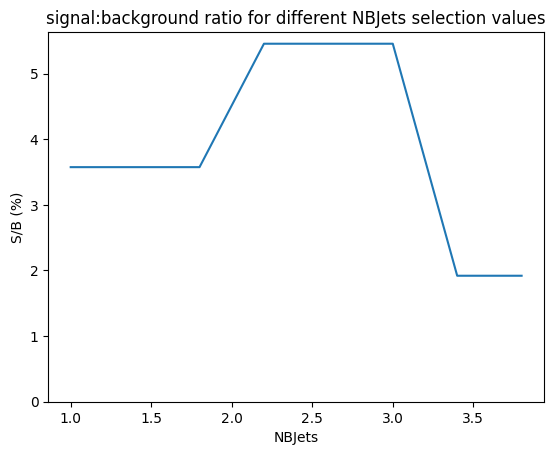

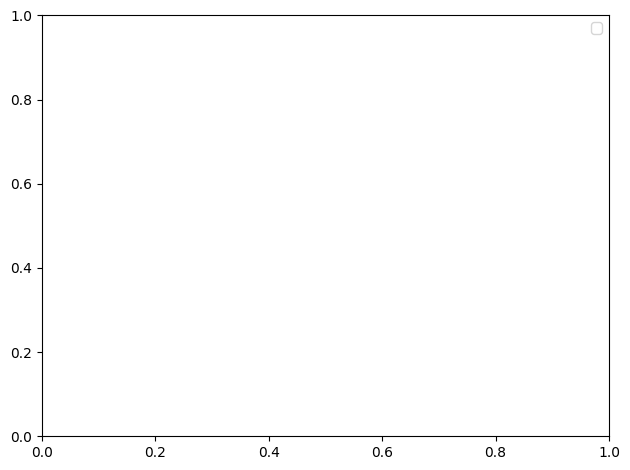

In [ ]:
variables = ['Mll', 'NJets', 'MET', 'LepDeltaPhi', 'LepDeltaR', 'SumLepPt', 'NBJets']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))

axes = axes.flatten()

for i, variable in enumerate(variables):
    plt.sca(axes[i])
    plot_separation(lhcdfselection2, x_variable=variable)
    plt.title('')
plt.legend('',frameon=True)

plt.tight_layout()

plt.show()


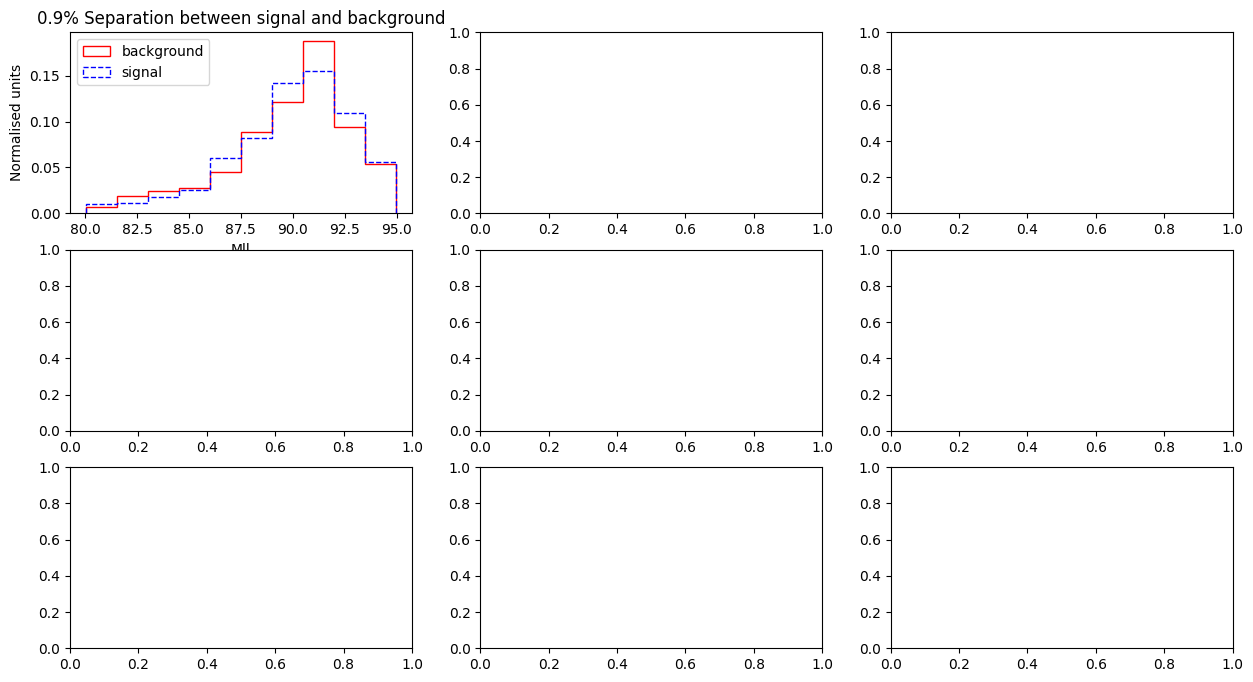

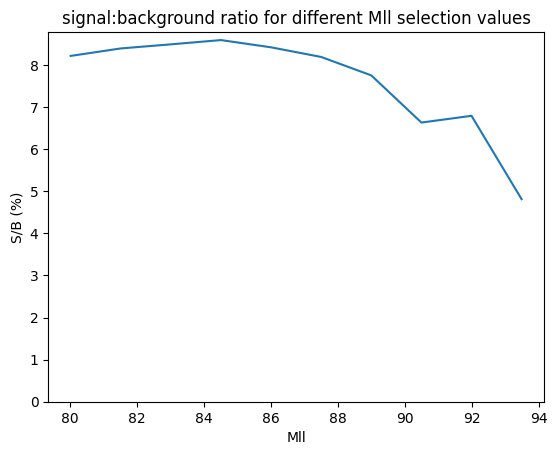

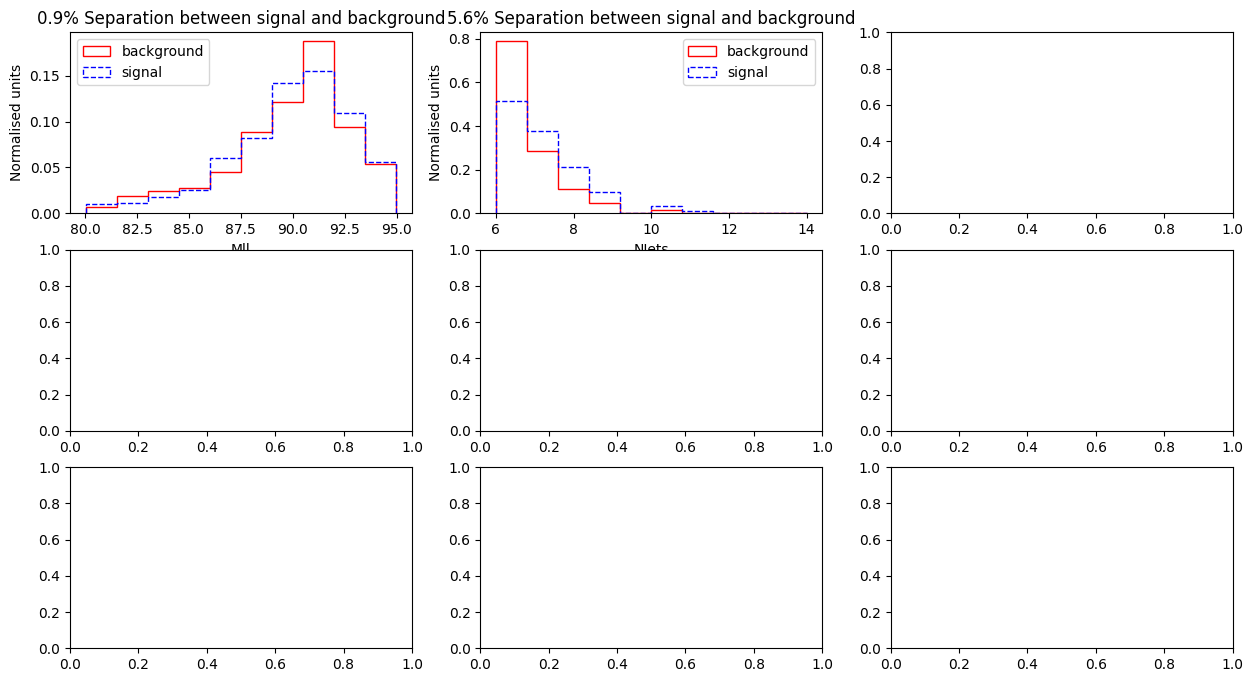

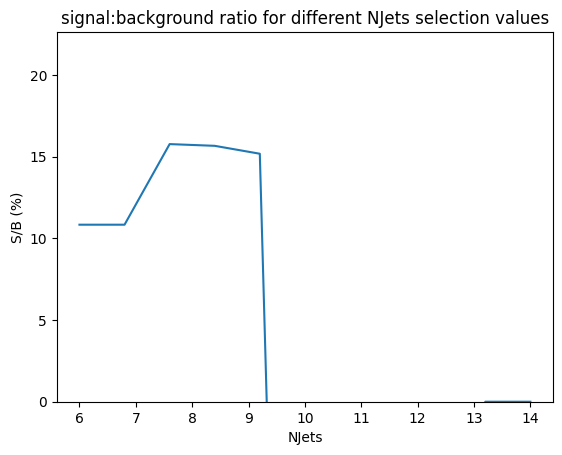

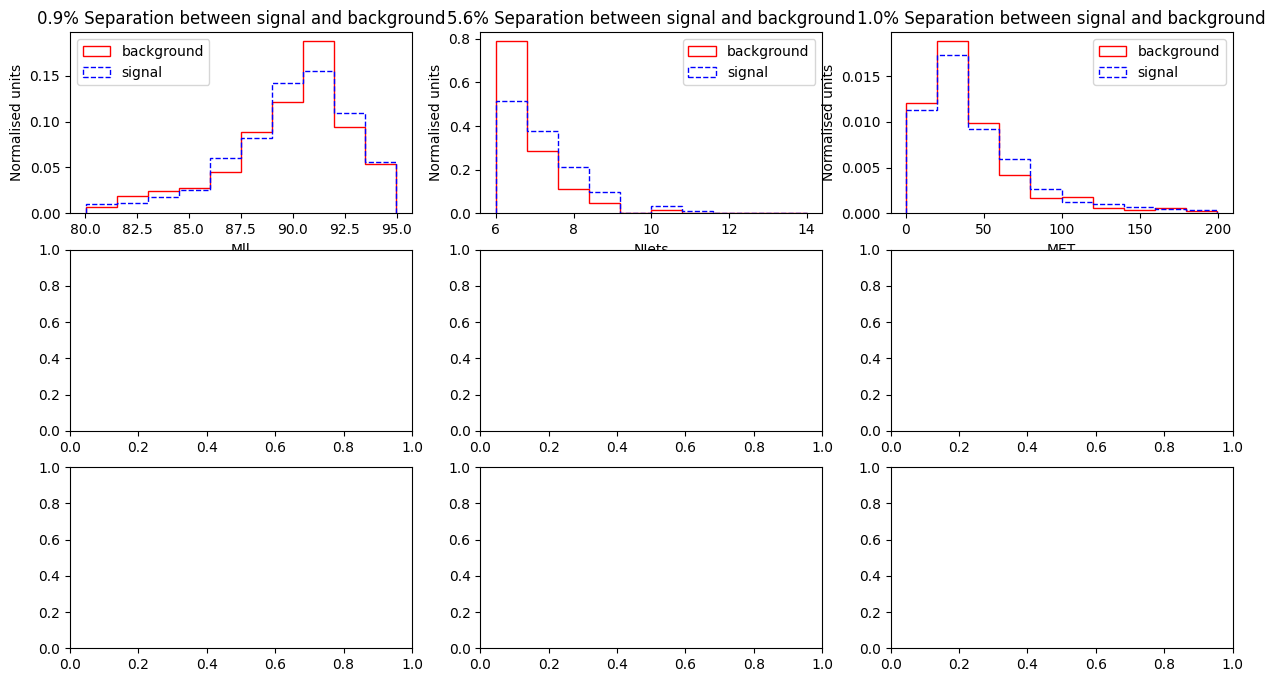

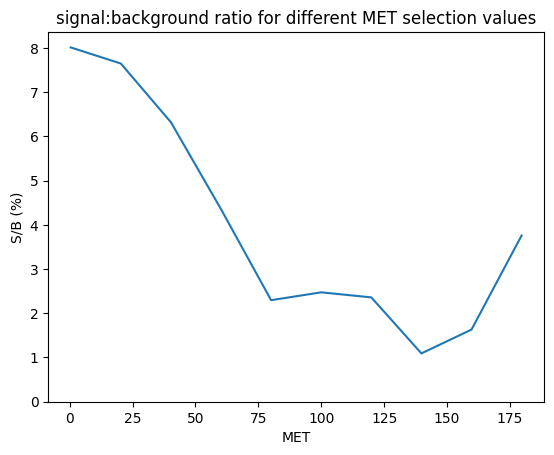

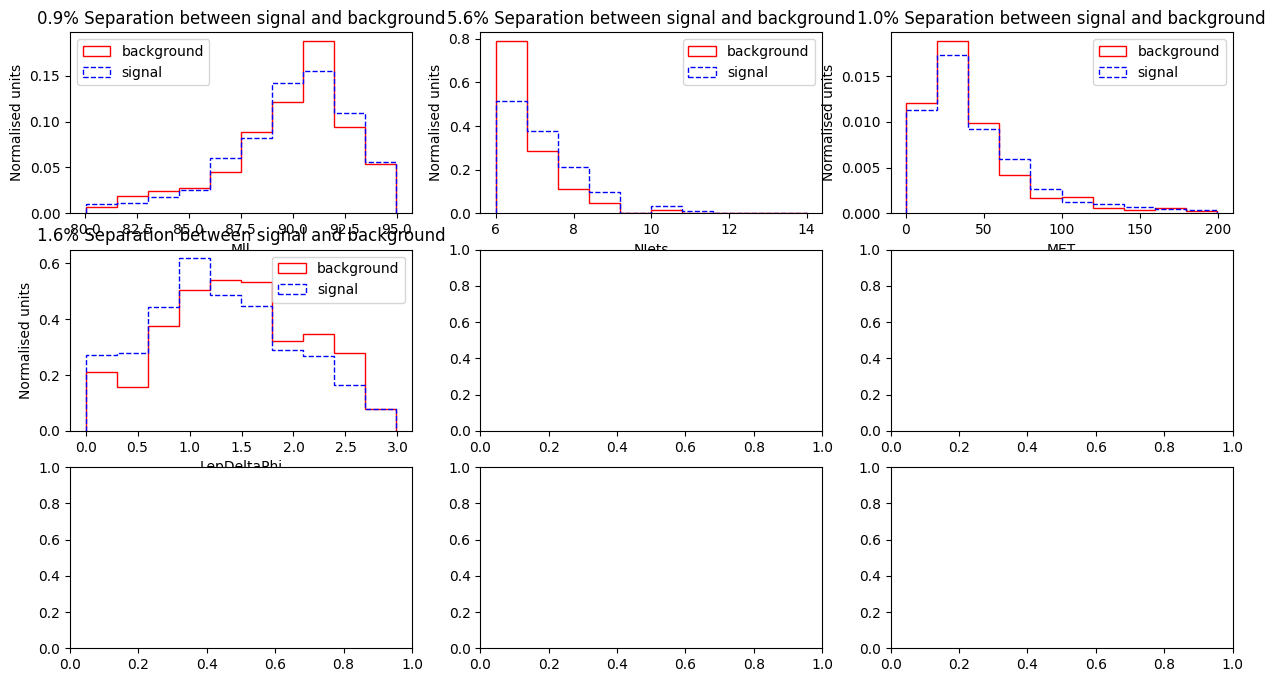

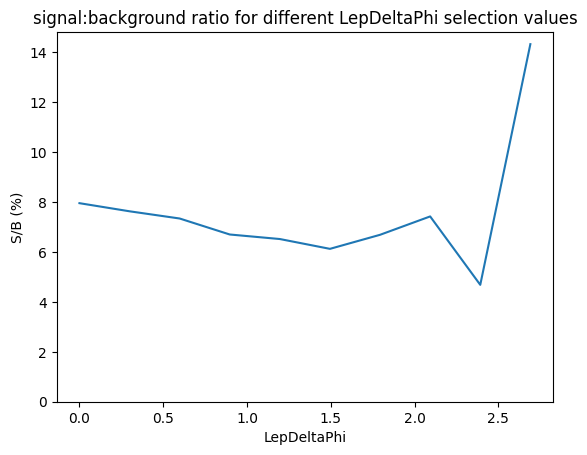

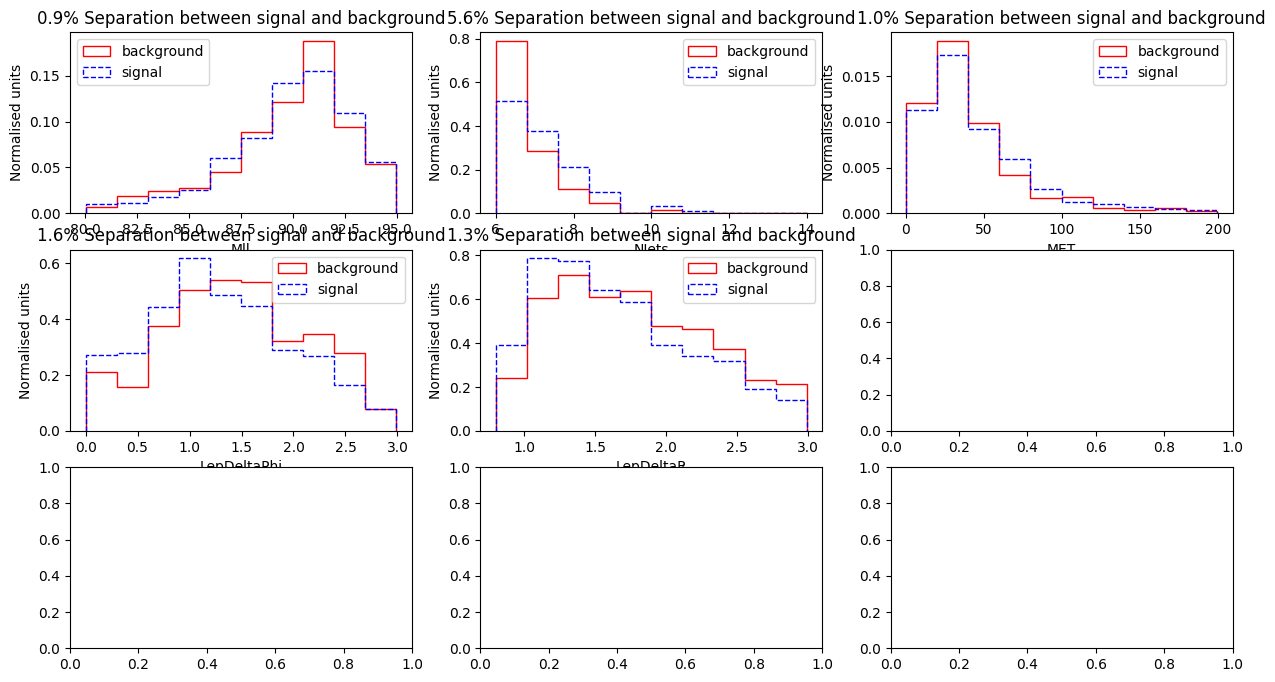

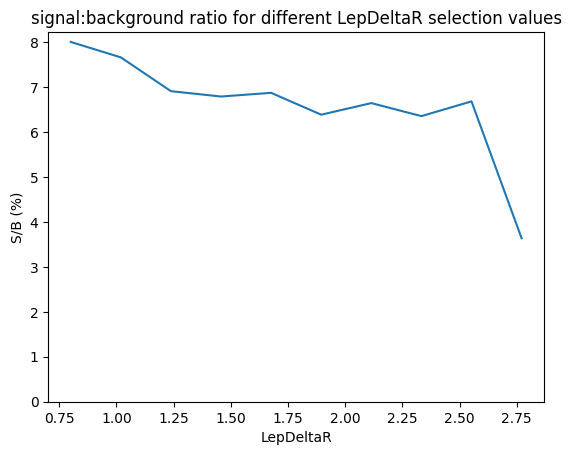

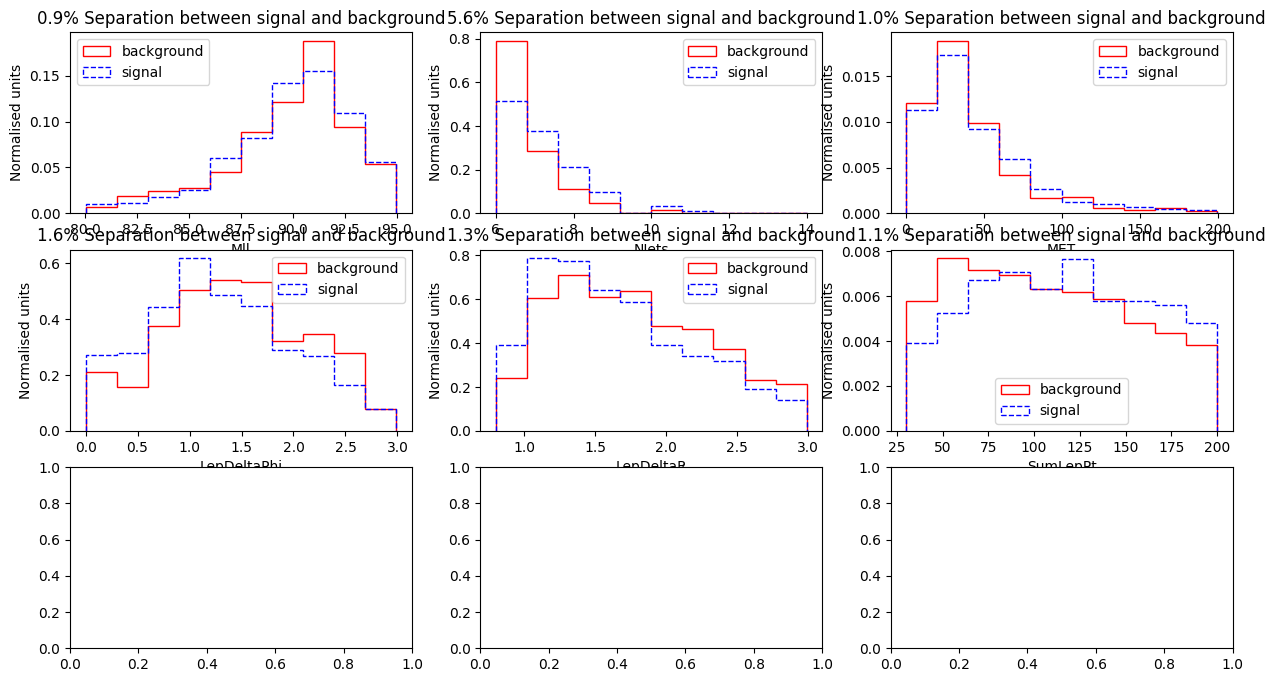

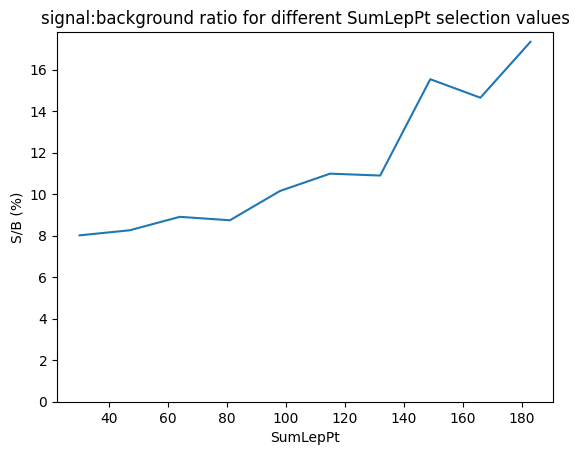

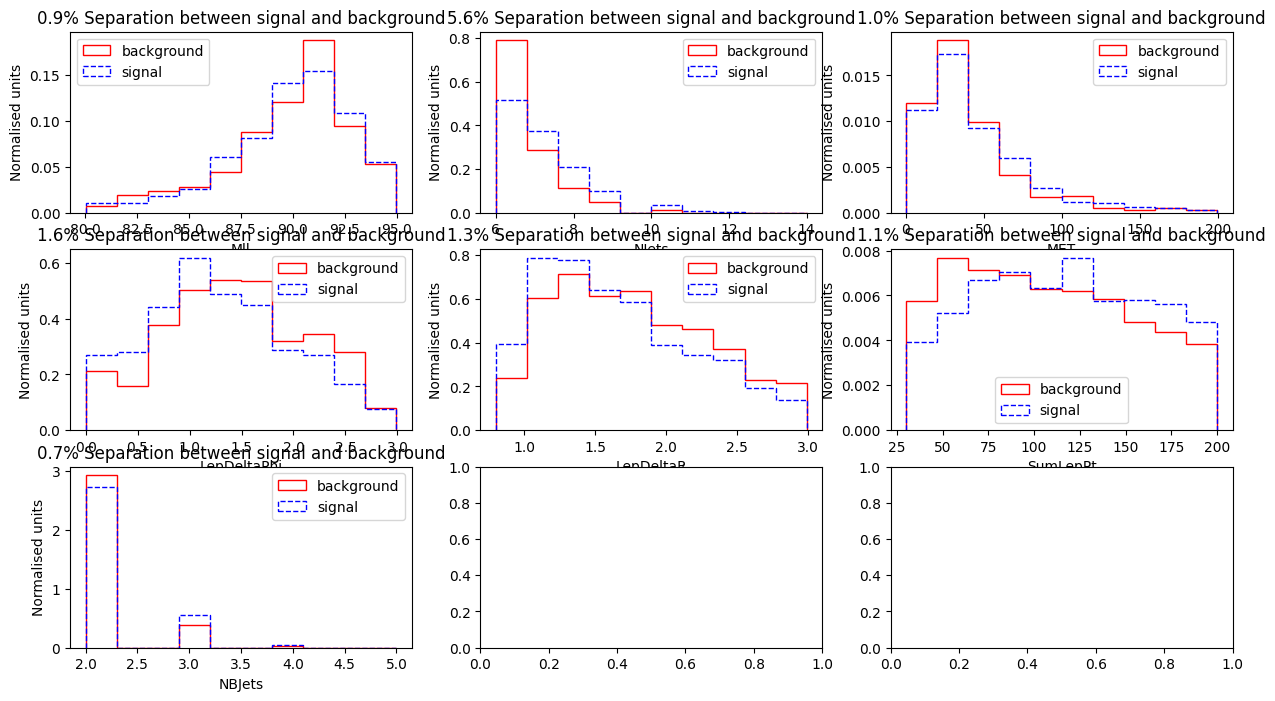

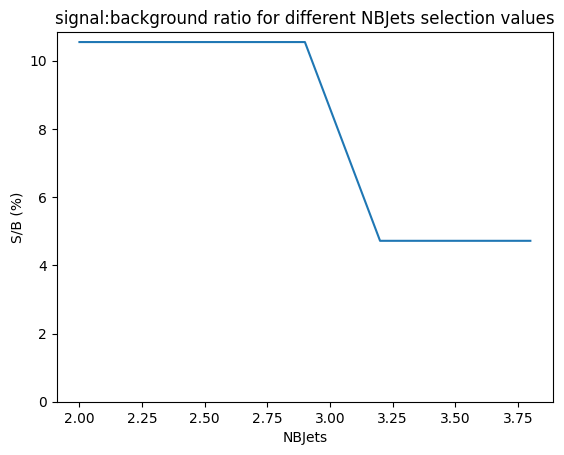

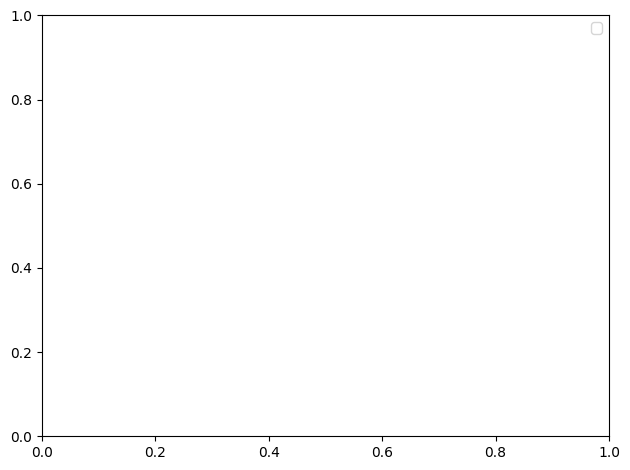

In [ ]:
variables = ['Mll', 'NJets', 'MET', 'LepDeltaPhi', 'LepDeltaR', 'SumLepPt', 'NBJets']

# Create subplots with 2 rows and 4 columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))

# Flatten the 2D array of axes for easy iteration
axes = axes.flatten()

# Plot each variable in a subplot
for i, variable in enumerate(variables):
    plt.sca(axes[i])
    plot_separation(lhcdfselection3, x_variable=variable)
    plt.title('')
plt.legend('',frameon=True)



# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

Start doing ML things

In [ ]:
ML_inputs = ['NJets','NBJets','MET','LepDeltaPhi','LepDeltaR','SumLepPt']
import seaborn as sns

def correlations(data):
  corrmat = data.corr()
  reversed_corrmat = corrmat.iloc[::-1]
  plt.figure(figsize=(10,8))
  sns.heatmap(reversed_corrmat, cmap='coolwarm', annot=True, fmt=".2f", linewidth=.5)
  plt.title('Correlations')

  plt.show()

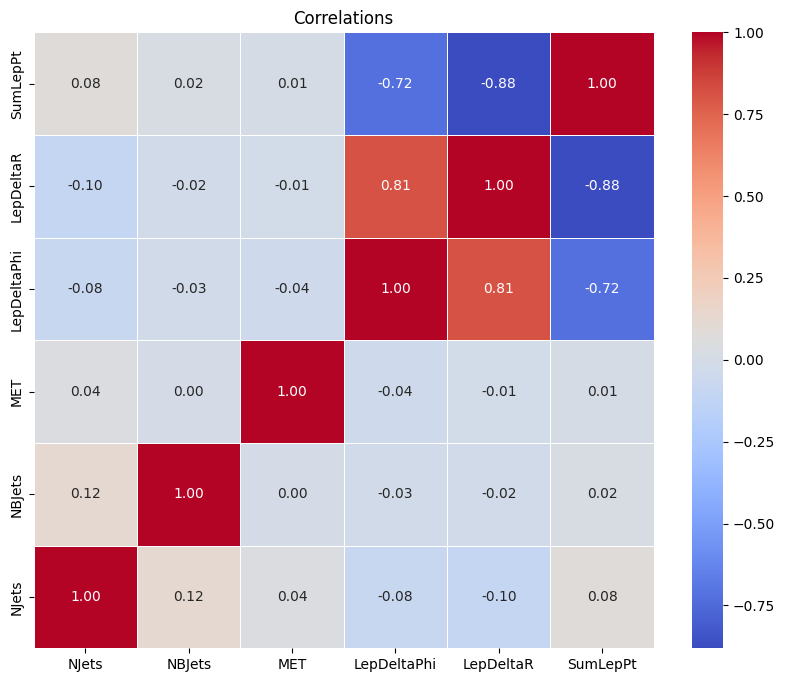

In [ ]:
correlations(lhcdfselection[ML_inputs])


In [ ]:
dfmeasured = lhcdfselection[lhcdfselection['type']==0]
dfsimulated = lhcdfselection[lhcdfselection[lhcdfselection['type']!=0]]

X = dfsimulated[ML_inputs]
y = np.concatenate([np.ones(dfsimulated[dfsimulated['type']==1].shape[0]), np.zeros(dfsimulated[dfsimulated['type']!=1].shape[0])])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

ValueError: Boolean array expected for the condition, not object

Neural nets ✅️


BDTs

Support vectors

Naive Bayes

KNN

Linear regression